# Jewelry Price Optimization with ML: Pricing Data to Refine Pricing Strategies

Unveiling the secets of jewelry pricing with machine learning, analysizing attribures, markets trends, and pricing dta to refine pricing strategies in the dynamic jewelry market.

### Business Overview/Problem
#### Business Problem I
Having recently expanded operations, Gemineye Emporium has grown from a relatively small jewelry provider to a large-scale jewelry designing and trading company. Although this is good news, this transition is a very fast one, and while it has gone well all things considered, there were some edge cases the company board did not see coming. One glaring instance is the product prices. This is actually the major pain point for the company at the moment.

#### Business Problem II

In the days where Gemineye was a small-scale holding, the price of any jewelry piece was very easy to determine or, in rare cases of confusion, ascertain. Now that operations have expanded exponentially, Gemineye finds itself not only importing pieces, but also manufacturing them in-house. With logistics concerns thrown into the mix, this becomes a more complicated system, and all these factors have two effects:

A. Complicate the price determination process, and
B. Inflate prices.

#### Business Problem III

Gemineye is in need of a means by which they can:

A. Make the most profit from their investment, and
B. Remain competitive by keeping their prices as affordable as possible.
 

In essence, they are in need of a way to maximize price to fill their pockets while minimizing it to suit the customers’ pockets. This is a tricky kettle of fish to boil!

 

Enter you, our intrepid data scientist. You have come up with the brilliant idea to leverage artificial intelligence (AI) for this task, which you have shared with the administrative team.


#### Business Problem IV

To be more specific, the specific challenges of interest are:

A. Market Dynamics: The jewelry market is influenced by trends, fashion, and changing consumer preferences, making pricing decisions complex.
 
B. Competitive Pricing: Setting prices that are competitive with other jewelry retailers while offering unique and high-quality pieces.
 
C. Cost Management: Balancing the cost of materials, craftsmanship, and overhead expenses with market pricing is crucial for profitability.

#### Exploratory Data Analysis (EDA)

#### Feature Selection

#### Feature Engineering

#### Dimensionality Reduction

#### Model Explainability

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# set visualizaton theme
sns.set()

In [2]:
import pandas as pd


# Read the test data
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Amdari\Churn\Jewrly\jewelry_Dataset.csv")

data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_Id",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",  
]

In [3]:
data.head()

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [4]:
# check for missing values
data.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_Id            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [5]:
data.shape

(95910, 13)

In [6]:
#feature cardinally
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_Id         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [7]:
# Data Description
data.describe()

,Order_ID,Product_Id,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [8]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_Id      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [9]:
## duplicates values
num_duplicated = len(data.loc[data.duplicated()])

In [10]:
print(f"Number of duplicates records: {num_duplicated}")

Number of duplicates records: 2589


In [11]:
## features with a cardinality of i
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()

In [12]:
invariant_features

['SKU_Quantity']

In [13]:
# check for label distribution
data["Price_USD"].skew()

18.95906072625981

In [14]:
data["Price_USD"].kurtosis()

1054.8979068506155

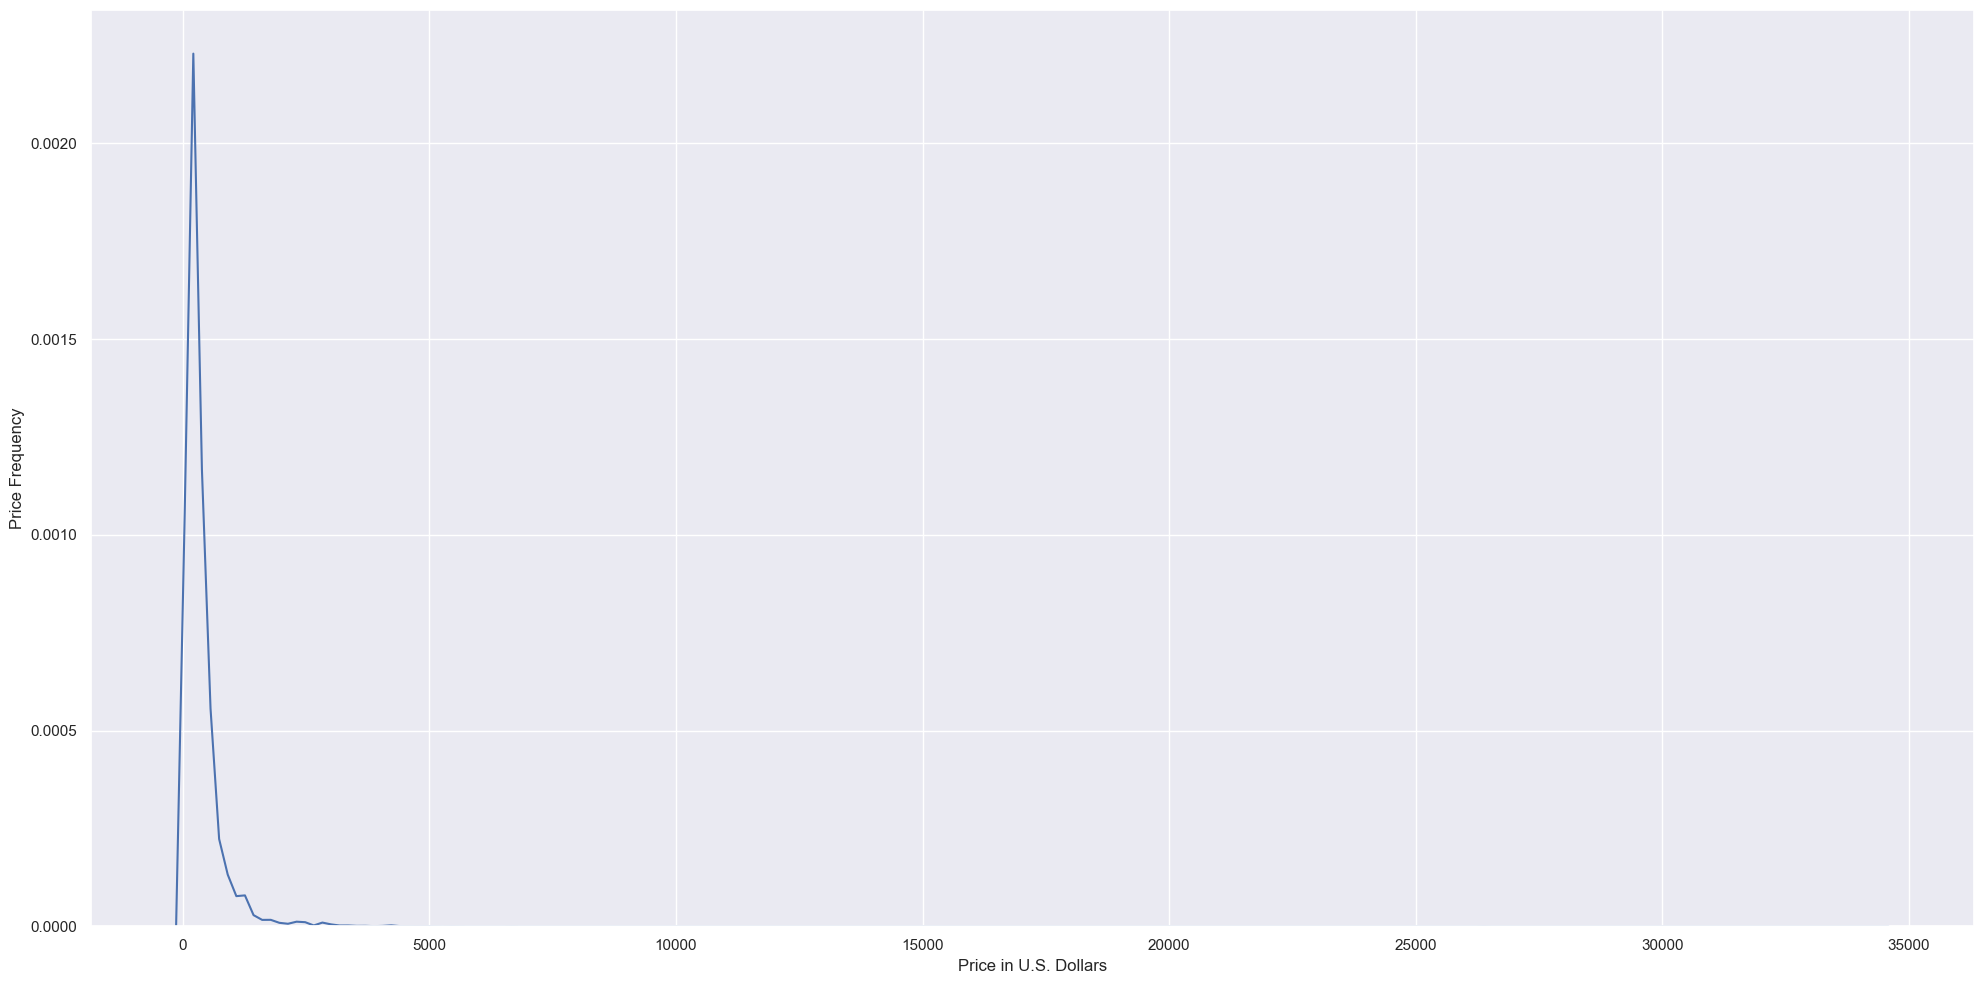

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(20, 10))

# Plotting the KDE plot for the 'Price_USD' column
sns.kdeplot(data=data, x="Price_USD")

# Adding labels to the plot
plt.xlabel("Price in U.S. Dollars")
plt.ylabel("Price Frequency")

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()

# Closing the plot to free up memory
plt.close()


In [16]:
# target gender analysis
data["Target_Gender"].value_counts()

f    47379
m      364
Name: Target_Gender, dtype: int64

In [17]:
data["Target_Gender"].value_counts(normalize=True)


f    0.992376
m    0.007624
Name: Target_Gender, dtype: float64

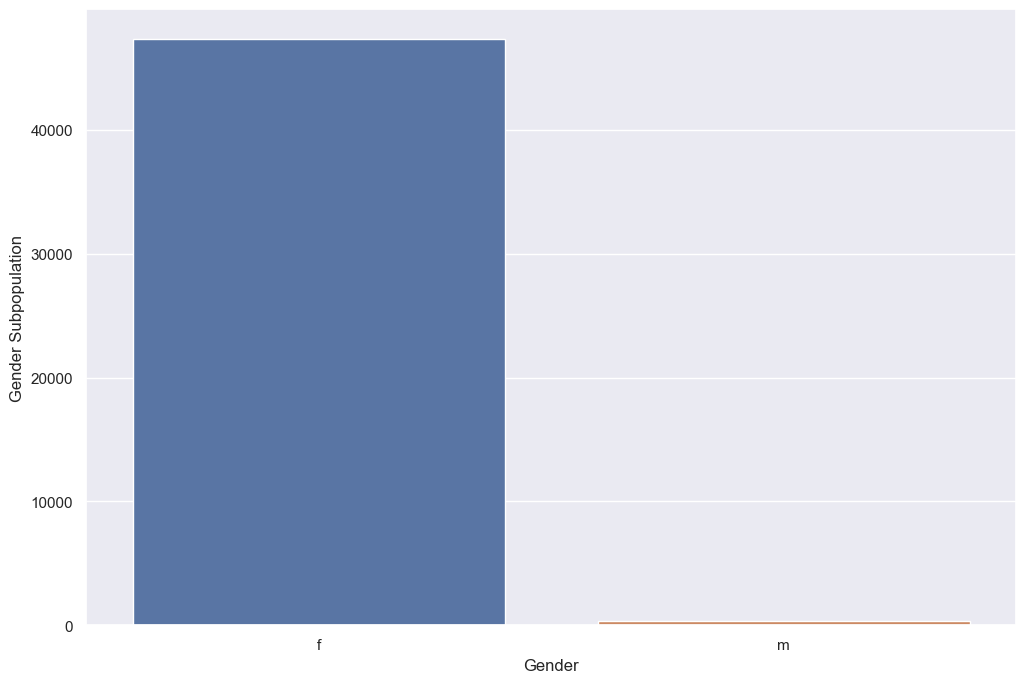

In [18]:
# visualise target gender
plt.figure( figsize = (12, 8))

sns.countplot(data = data, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")
plt.show()

In [19]:
# jewery category analysis
data['Category'].value_counts()

jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: Category, Length: 218, dtype: int64

In [20]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [21]:
categories= data["Category"].unique().tolist()
categories= [c for c in categories if isinstance(c,str) and "jewelry" in c]

In [22]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [23]:
# pick out  authentic data based on categries
real_categories = data.loc[data["Category"].isin(categories)]

In [24]:
100 * data.isnull().sum() / len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_Id         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [25]:
100 * real_categories.isnull().sum() / len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_Id         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

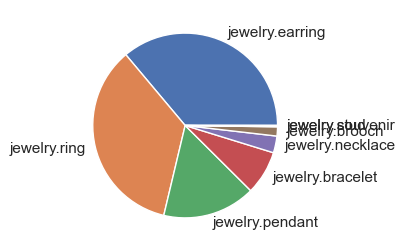

In [26]:
# visualise jelwery caegories
subdata = real_categories["Category"].value_counts()
jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize = (12, 3))
plt.pie(x = counts, labels = jewelry_categories)
plt.show()
plt.close()



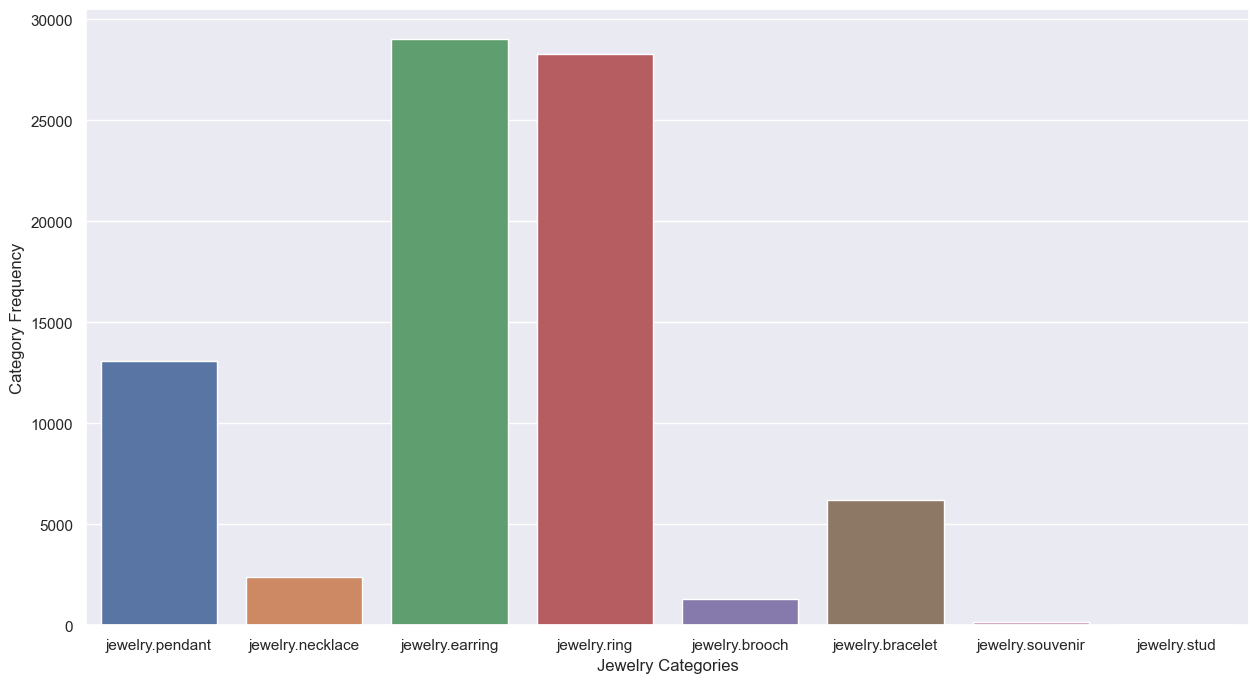

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming real_categories and the necessary imports are already defined
plt.figure(figsize=(15, 8))
sns.countplot(data=real_categories, x="Category")
plt.xlabel("Jewelry Categories")
plt.ylabel("Category Frequency")
plt.show(); plt.close()


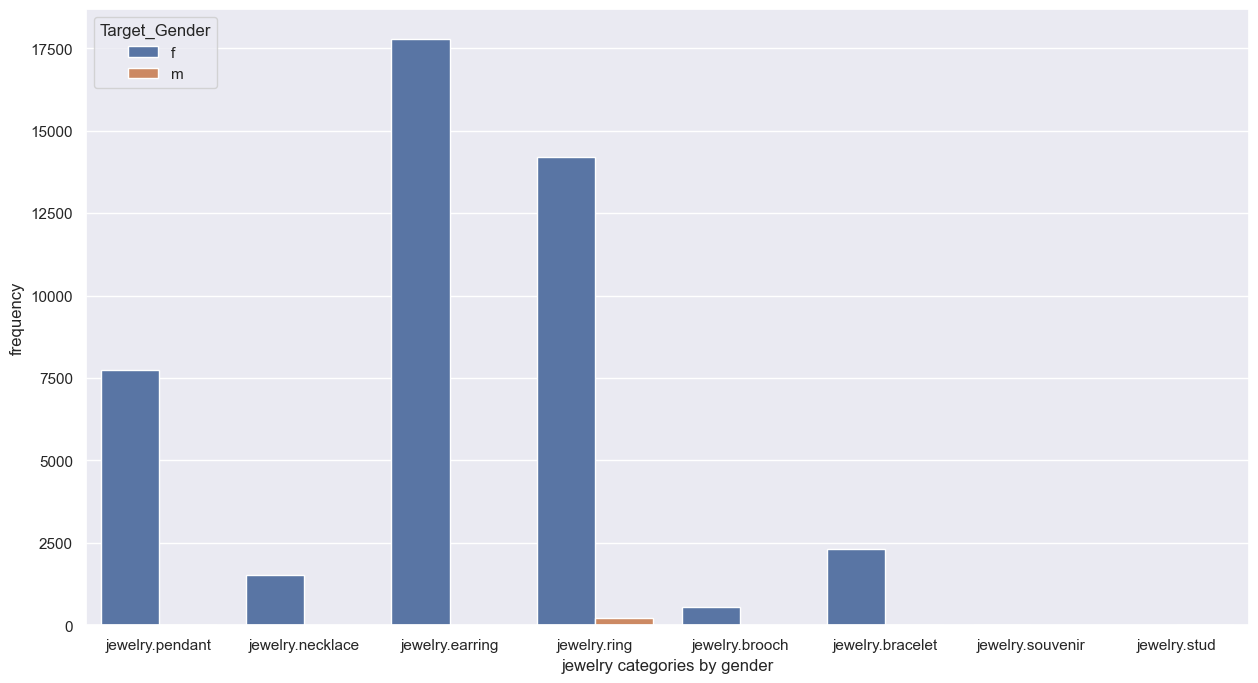

In [28]:
# jewelry category by gender
plt.figure(figsize = (15,8))

sns.countplot(data = real_categories, x = "Category", hue = "Target_Gender")
plt.xlabel("jewelry categories by gender")
plt.ylabel("frequency")
plt.show()

In [29]:
real_categories["Target_Gender"].value_counts(normalize=True)


f    0.994434
m    0.005566
Name: Target_Gender, dtype: float64

In [30]:
encoded, category_code = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

C:\Users\Admin\AppData\Local\Temp\ipykernel_3296\3811857425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Category"] = encoded


In [31]:
encode, category_code = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

C:\Users\Admin\AppData\Local\Temp\ipykernel_3296\3762426593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Target_Gender"] = encoded


In [32]:
encode, category_code = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

C:\Users\Admin\AppData\Local\Temp\ipykernel_3296\3959664000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Main_Gem"] = encoded


In [33]:
encoded, category_code = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

C:\Users\Admin\AppData\Local\Temp\ipykernel_3296\1862369121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Main_Color"] = encoded


In [34]:
encoded, category_code = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

C:\Users\Admin\AppData\Local\Temp\ipykernel_3296\2020405121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_categories.loc[:, "Main_Metal"] = encoded


In [35]:
data.head()

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [36]:
real_categories.head()

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,0
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,1,1,0,1
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,2,1,0,2
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,2,1,0,2


In [37]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   Product_Id      80458 non-null  int64  
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  int64  
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  int64  
 10  Main_Color      80458 non-null  int64  
 11  Main_Metal      80458 non-null  int64  
 12  Main_Gem        80458 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 8.6+ MB


In [38]:
# feature correlation
correlation = real_categories.drop(labels = ["Order_Datetime", "User_ID", "Order_ID", "Product_Id" ], axis = 1).corr(method = "spearman")

In [39]:
correlation

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,-0.886212,0.003396,0.157834,-0.886212
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,1.000000,-0.059402,0.105056,1.000000
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,-0.111680,0.100816,0.003835,-0.111680
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.267257,0.013177,-0.173050,0.267257
Target_Gender,NaN,-0.886212,1.000000,-0.111680,0.267257,1.000000,-0.059402,0.105056,1.000000
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,-0.059402,1.000000,-0.238080,-0.059402
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,0.105056,-0.238080,1.000000,0.105056
Main_Gem,NaN,-0.886212,1.000000,-0.111680,0.267257,1.000000,-0.059402,0.105056,1.000000


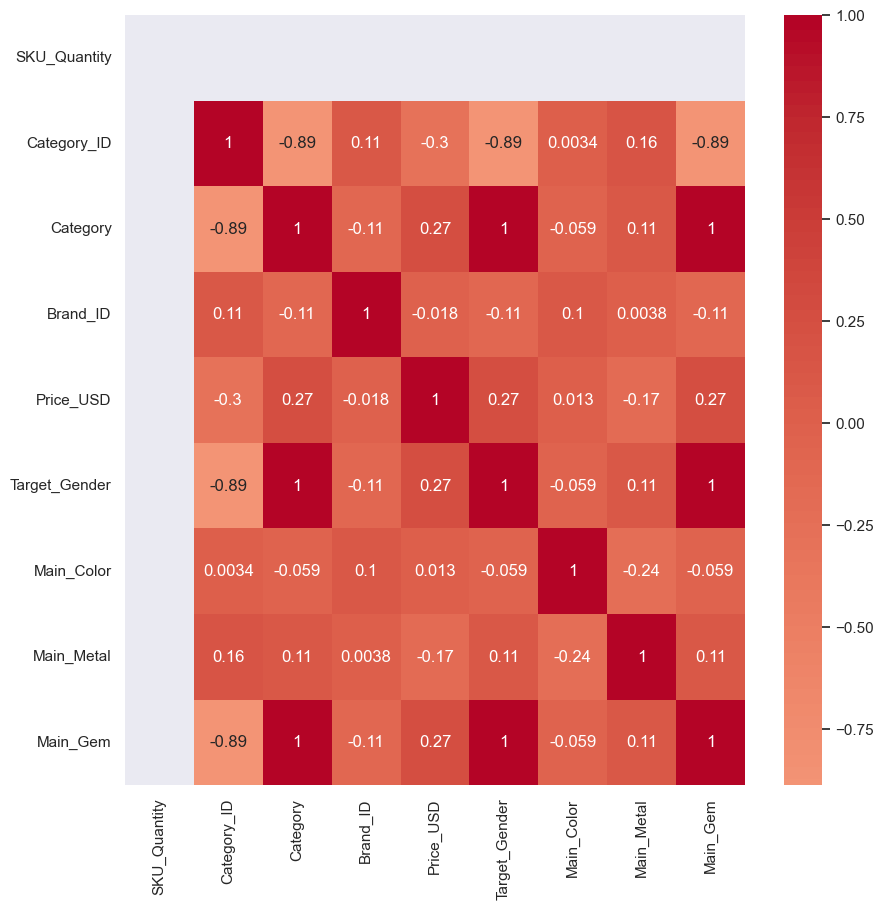

In [40]:
# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, center=-3, cmap="coolwarm")
plt.show()

In [41]:
# set correlation limit
upper = 1
lower = .2

In [42]:
# Dictionary to store columns with correlations within the specified range for each column
correlated_columns = {
    column: correlation[(correlation[column] > lower) & (correlation[column] < upper)].index.tolist()
    for column in correlation.columns
}


In [43]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': [],
 'Price_USD': ['Category', 'Target_Gender', 'Main_Gem'],
 'Target_Gender': ['Price_USD'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': ['Price_USD']}

In [44]:
data.head()

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_Id      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [46]:
#columns to eliminate
columns_to_elminate = [
    "SKU_Quantity",
    "Order_ID",
    "Product_Id",
    "User_ID",
    "Category_ID",
]

In [47]:
data.drop(labels = columns_to_elminate, axis = 1, inplace = True ) 

In [48]:
data.shape

(95910, 8)

In [49]:
data.drop(labels =["Order_Datetime"] , axis = 1, inplace = True ) 

In [50]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [51]:
#Eliminate unrealistic categoies
data = data.loc[data["Category"].isin(categories),:]

In [52]:
data.shape

(80458, 7)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
#seperate feature from labels
x,y = data.drop(labels = ["Price_USD"], axis = 1), data["Price_USD"]

In [55]:
## create test and train test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .1)

In [56]:
x_train.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
87753,jewelry.ring,1.0,f,red,gold,fianit
69601,jewelry.earring,0.0,NaN,red,gold,diamond
84460,jewelry.earring,1.0,f,red,gold,pearl
80773,jewelry.earring,0.0,NaN,red,gold,diamond
36577,jewelry.earring,1.0,f,red,gold,fianit


In [57]:
# pip install catboost


In [58]:
y_train.head()

87753     143.70
69601    1109.45
84460     273.84
80773     513.56
36577     253.29
Name: Price_USD, dtype: float64

In [59]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor


### Data Modelling 

In [60]:
from sklearn.pipeline import Pipeline

In [61]:
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):
    first_transformer = ColumnTransformer(
        transformers = [
            ("inputer", SimpleImputer(strategy = "most_frequent"), column_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
    
    second_transformer = ColumnTransformer(
        transformers = [
            ("one_hot",OneHotEncoder(),categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
    
    third_transformer = ColumnTransformer(
        transformers = [
            ("ordinal",OrdinalEncoder(),categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
    
    steps = []
    
    if fill_missing:
        steps.append(("first", first_transformer))
        
    if label_encode:
        steps.append(("third", third_transformer))
        
    if one_hot:
        steps.append(("second", second_transformer))
        
    steps.append(("model", model))
        
    model_pipe = Pipeline(steps = steps)
    
    return model_pipe

In [62]:
# Generate indices
columns = x.columns.tolist()
column_indices = [columns.index(c) for c in columns]  # Example indices
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]

In [63]:
categorical_indices

[0, 2, 3, 4, 5]

In [64]:
# catboost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [65]:
# LR pipeline
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [66]:
# ada pipeline
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators=1000, learning_rate=.01),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [67]:
# LR pipeline
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators=1000, bootstrap=True),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [68]:
from sklearn.preprocessing import PowerTransformer

In [69]:
# Transform Targets
cat_pipe = TransformedTargetRegressor(regressor=cat_pipe, transformer=PowerTransformer(method="yeo-johnson"))
ada_pipe = TransformedTargetRegressor(regressor=ada_pipe, transformer=PowerTransformer(method="yeo-johnson"))
lin_pipe = TransformedTargetRegressor(regressor=lin_pipe, transformer=PowerTransformer(method="yeo-johnson"))
extra_pipe = TransformedTargetRegressor(regressor=extra_pipe, transformer=PowerTransformer(method="yeo-johnson"))


In [70]:
#Fit catboost
cat_pipe.fit(x_train, y_train)

0:	learn: 0.9628839	total: 166ms	remaining: 27m 39s
1:	learn: 0.9245768	total: 176ms	remaining: 14m 40s
2:	learn: 0.8978413	total: 187ms	remaining: 10m 22s
3:	learn: 0.8702915	total: 198ms	remaining: 8m 15s
4:	learn: 0.8460219	total: 208ms	remaining: 6m 56s
5:	learn: 0.8290081	total: 218ms	remaining: 6m 2s
6:	learn: 0.8144333	total: 228ms	remaining: 5m 25s
7:	learn: 0.7993819	total: 238ms	remaining: 4m 56s
8:	learn: 0.7893250	total: 248ms	remaining: 4m 35s
9:	learn: 0.7798258	total: 258ms	remaining: 4m 17s
10:	learn: 0.7693771	total: 267ms	remaining: 4m 2s
11:	learn: 0.7614961	total: 276ms	remaining: 3m 49s
12:	learn: 0.7555627	total: 286ms	remaining: 3m 39s
13:	learn: 0.7502636	total: 295ms	remaining: 3m 30s
14:	learn: 0.7453421	total: 304ms	remaining: 3m 22s
15:	learn: 0.7383985	total: 314ms	remaining: 3m 16s
16:	learn: 0.7338706	total: 324ms	remaining: 3m 10s
17:	learn: 0.7281080	total: 333ms	remaining: 3m 4s
18:	learn: 0.7245477	total: 345ms	remaining: 3m 1s
19:	learn: 0.7198971	to

163:	learn: 0.6428067	total: 1.94s	remaining: 1m 56s
164:	learn: 0.6425115	total: 1.95s	remaining: 1m 56s
165:	learn: 0.6424222	total: 1.96s	remaining: 1m 55s
166:	learn: 0.6423208	total: 1.97s	remaining: 1m 55s
167:	learn: 0.6422295	total: 1.98s	remaining: 1m 55s
168:	learn: 0.6421324	total: 1.99s	remaining: 1m 55s
169:	learn: 0.6420492	total: 2s	remaining: 1m 55s
170:	learn: 0.6419002	total: 2s	remaining: 1m 55s
171:	learn: 0.6418094	total: 2.02s	remaining: 1m 55s
172:	learn: 0.6417301	total: 2.02s	remaining: 1m 54s
173:	learn: 0.6416554	total: 2.03s	remaining: 1m 54s
174:	learn: 0.6415102	total: 2.04s	remaining: 1m 54s
175:	learn: 0.6414407	total: 2.05s	remaining: 1m 54s
176:	learn: 0.6413713	total: 2.06s	remaining: 1m 54s
177:	learn: 0.6412512	total: 2.07s	remaining: 1m 54s
178:	learn: 0.6411810	total: 2.08s	remaining: 1m 54s
179:	learn: 0.6410798	total: 2.09s	remaining: 1m 54s
180:	learn: 0.6410381	total: 2.1s	remaining: 1m 53s
181:	learn: 0.6408634	total: 2.11s	remaining: 1m 53s


330:	learn: 0.6299804	total: 3.73s	remaining: 1m 48s
331:	learn: 0.6299324	total: 3.74s	remaining: 1m 48s
332:	learn: 0.6298983	total: 3.76s	remaining: 1m 49s
333:	learn: 0.6298462	total: 3.78s	remaining: 1m 49s
334:	learn: 0.6297669	total: 3.79s	remaining: 1m 49s
335:	learn: 0.6297474	total: 3.8s	remaining: 1m 49s
336:	learn: 0.6296777	total: 3.82s	remaining: 1m 49s
337:	learn: 0.6296421	total: 3.83s	remaining: 1m 49s
338:	learn: 0.6296216	total: 3.85s	remaining: 1m 49s
339:	learn: 0.6295704	total: 3.87s	remaining: 1m 49s
340:	learn: 0.6295403	total: 3.88s	remaining: 1m 50s
341:	learn: 0.6295036	total: 3.9s	remaining: 1m 50s
342:	learn: 0.6294828	total: 3.91s	remaining: 1m 50s
343:	learn: 0.6294257	total: 3.93s	remaining: 1m 50s
344:	learn: 0.6293727	total: 3.94s	remaining: 1m 50s
345:	learn: 0.6292344	total: 3.95s	remaining: 1m 50s
346:	learn: 0.6292157	total: 3.97s	remaining: 1m 50s
347:	learn: 0.6292005	total: 3.99s	remaining: 1m 50s
348:	learn: 0.6291663	total: 4s	remaining: 1m 50

502:	learn: 0.6241381	total: 5.74s	remaining: 1m 48s
503:	learn: 0.6241249	total: 5.75s	remaining: 1m 48s
504:	learn: 0.6241136	total: 5.76s	remaining: 1m 48s
505:	learn: 0.6241015	total: 5.77s	remaining: 1m 48s
506:	learn: 0.6240948	total: 5.78s	remaining: 1m 48s
507:	learn: 0.6240907	total: 5.79s	remaining: 1m 48s
508:	learn: 0.6240851	total: 5.8s	remaining: 1m 48s
509:	learn: 0.6240650	total: 5.8s	remaining: 1m 48s
510:	learn: 0.6240466	total: 5.82s	remaining: 1m 47s
511:	learn: 0.6240295	total: 5.82s	remaining: 1m 47s
512:	learn: 0.6240037	total: 5.83s	remaining: 1m 47s
513:	learn: 0.6239957	total: 5.84s	remaining: 1m 47s
514:	learn: 0.6239762	total: 5.85s	remaining: 1m 47s
515:	learn: 0.6239646	total: 5.86s	remaining: 1m 47s
516:	learn: 0.6239532	total: 5.87s	remaining: 1m 47s
517:	learn: 0.6239426	total: 5.88s	remaining: 1m 47s
518:	learn: 0.6239370	total: 5.89s	remaining: 1m 47s
519:	learn: 0.6239347	total: 5.9s	remaining: 1m 47s
520:	learn: 0.6238953	total: 5.91s	remaining: 1m 

658:	learn: 0.6214018	total: 7.44s	remaining: 1m 45s
659:	learn: 0.6213961	total: 7.45s	remaining: 1m 45s
660:	learn: 0.6213680	total: 7.46s	remaining: 1m 45s
661:	learn: 0.6213540	total: 7.47s	remaining: 1m 45s
662:	learn: 0.6213485	total: 7.48s	remaining: 1m 45s
663:	learn: 0.6213415	total: 7.49s	remaining: 1m 45s
664:	learn: 0.6213306	total: 7.5s	remaining: 1m 45s
665:	learn: 0.6213277	total: 7.51s	remaining: 1m 45s
666:	learn: 0.6213277	total: 7.51s	remaining: 1m 45s
667:	learn: 0.6213222	total: 7.52s	remaining: 1m 45s
668:	learn: 0.6213203	total: 7.53s	remaining: 1m 45s
669:	learn: 0.6213089	total: 7.54s	remaining: 1m 45s
670:	learn: 0.6212964	total: 7.55s	remaining: 1m 44s
671:	learn: 0.6212917	total: 7.56s	remaining: 1m 44s
672:	learn: 0.6212817	total: 7.57s	remaining: 1m 44s
673:	learn: 0.6212779	total: 7.58s	remaining: 1m 44s
674:	learn: 0.6212655	total: 7.59s	remaining: 1m 44s
675:	learn: 0.6212647	total: 7.59s	remaining: 1m 44s
676:	learn: 0.6212551	total: 7.6s	remaining: 1m

825:	learn: 0.6197549	total: 9.29s	remaining: 1m 43s
826:	learn: 0.6197407	total: 9.31s	remaining: 1m 43s
827:	learn: 0.6197348	total: 9.32s	remaining: 1m 43s
828:	learn: 0.6197257	total: 9.34s	remaining: 1m 43s
829:	learn: 0.6197146	total: 9.35s	remaining: 1m 43s
830:	learn: 0.6196859	total: 9.36s	remaining: 1m 43s
831:	learn: 0.6196838	total: 9.38s	remaining: 1m 43s
832:	learn: 0.6196816	total: 9.38s	remaining: 1m 43s
833:	learn: 0.6196789	total: 9.39s	remaining: 1m 43s
834:	learn: 0.6196778	total: 9.4s	remaining: 1m 43s
835:	learn: 0.6196743	total: 9.41s	remaining: 1m 43s
836:	learn: 0.6196662	total: 9.42s	remaining: 1m 43s
837:	learn: 0.6196635	total: 9.43s	remaining: 1m 43s
838:	learn: 0.6196612	total: 9.44s	remaining: 1m 43s
839:	learn: 0.6196511	total: 9.46s	remaining: 1m 43s
840:	learn: 0.6196387	total: 9.47s	remaining: 1m 43s
841:	learn: 0.6196236	total: 9.48s	remaining: 1m 43s
842:	learn: 0.6196193	total: 9.5s	remaining: 1m 43s
843:	learn: 0.6196107	total: 9.51s	remaining: 1m

988:	learn: 0.6185100	total: 11.1s	remaining: 1m 40s
989:	learn: 0.6185042	total: 11.1s	remaining: 1m 40s
990:	learn: 0.6184985	total: 11.1s	remaining: 1m 40s
991:	learn: 0.6184927	total: 11.1s	remaining: 1m 40s
992:	learn: 0.6184901	total: 11.1s	remaining: 1m 40s
993:	learn: 0.6184879	total: 11.1s	remaining: 1m 40s
994:	learn: 0.6184826	total: 11.1s	remaining: 1m 40s
995:	learn: 0.6184700	total: 11.1s	remaining: 1m 40s
996:	learn: 0.6184683	total: 11.2s	remaining: 1m 40s
997:	learn: 0.6184571	total: 11.2s	remaining: 1m 40s
998:	learn: 0.6184435	total: 11.2s	remaining: 1m 40s
999:	learn: 0.6184351	total: 11.2s	remaining: 1m 40s
1000:	learn: 0.6184163	total: 11.2s	remaining: 1m 40s
1001:	learn: 0.6184122	total: 11.2s	remaining: 1m 40s
1002:	learn: 0.6184024	total: 11.2s	remaining: 1m 40s
1003:	learn: 0.6184019	total: 11.2s	remaining: 1m 40s
1004:	learn: 0.6183946	total: 11.2s	remaining: 1m 40s
1005:	learn: 0.6183908	total: 11.2s	remaining: 1m 40s
1006:	learn: 0.6183864	total: 11.2s	rema

1147:	learn: 0.6176535	total: 12.7s	remaining: 1m 37s
1148:	learn: 0.6176519	total: 12.7s	remaining: 1m 37s
1149:	learn: 0.6176489	total: 12.7s	remaining: 1m 37s
1150:	learn: 0.6176419	total: 12.7s	remaining: 1m 37s
1151:	learn: 0.6176401	total: 12.7s	remaining: 1m 37s
1152:	learn: 0.6176398	total: 12.7s	remaining: 1m 37s
1153:	learn: 0.6176291	total: 12.7s	remaining: 1m 37s
1154:	learn: 0.6176120	total: 12.7s	remaining: 1m 37s
1155:	learn: 0.6176109	total: 12.7s	remaining: 1m 37s
1156:	learn: 0.6175914	total: 12.8s	remaining: 1m 37s
1157:	learn: 0.6175868	total: 12.8s	remaining: 1m 37s
1158:	learn: 0.6175831	total: 12.8s	remaining: 1m 37s
1159:	learn: 0.6175796	total: 12.8s	remaining: 1m 37s
1160:	learn: 0.6175786	total: 12.8s	remaining: 1m 37s
1161:	learn: 0.6175786	total: 12.8s	remaining: 1m 37s
1162:	learn: 0.6175753	total: 12.8s	remaining: 1m 37s
1163:	learn: 0.6175698	total: 12.8s	remaining: 1m 37s
1164:	learn: 0.6175640	total: 12.8s	remaining: 1m 37s
1165:	learn: 0.6175640	total

1305:	learn: 0.6170714	total: 14.2s	remaining: 1m 34s
1306:	learn: 0.6170665	total: 14.2s	remaining: 1m 34s
1307:	learn: 0.6170603	total: 14.2s	remaining: 1m 34s
1308:	learn: 0.6170591	total: 14.3s	remaining: 1m 34s
1309:	learn: 0.6170591	total: 14.3s	remaining: 1m 34s
1310:	learn: 0.6170566	total: 14.3s	remaining: 1m 34s
1311:	learn: 0.6170565	total: 14.3s	remaining: 1m 34s
1312:	learn: 0.6170561	total: 14.3s	remaining: 1m 34s
1313:	learn: 0.6170558	total: 14.3s	remaining: 1m 34s
1314:	learn: 0.6170548	total: 14.3s	remaining: 1m 34s
1315:	learn: 0.6170534	total: 14.3s	remaining: 1m 34s
1316:	learn: 0.6170529	total: 14.3s	remaining: 1m 34s
1317:	learn: 0.6170491	total: 14.3s	remaining: 1m 34s
1318:	learn: 0.6170426	total: 14.3s	remaining: 1m 34s
1319:	learn: 0.6170410	total: 14.3s	remaining: 1m 34s
1320:	learn: 0.6170399	total: 14.4s	remaining: 1m 34s
1321:	learn: 0.6170399	total: 14.4s	remaining: 1m 34s
1322:	learn: 0.6170395	total: 14.4s	remaining: 1m 34s
1323:	learn: 0.6170394	total

1473:	learn: 0.6166649	total: 15.8s	remaining: 1m 31s
1474:	learn: 0.6166643	total: 15.8s	remaining: 1m 31s
1475:	learn: 0.6166643	total: 15.8s	remaining: 1m 31s
1476:	learn: 0.6166628	total: 15.8s	remaining: 1m 31s
1477:	learn: 0.6166613	total: 15.8s	remaining: 1m 31s
1478:	learn: 0.6166601	total: 15.8s	remaining: 1m 31s
1479:	learn: 0.6166601	total: 15.8s	remaining: 1m 31s
1480:	learn: 0.6166588	total: 15.9s	remaining: 1m 31s
1481:	learn: 0.6166567	total: 15.9s	remaining: 1m 31s
1482:	learn: 0.6166555	total: 15.9s	remaining: 1m 31s
1483:	learn: 0.6166555	total: 15.9s	remaining: 1m 31s
1484:	learn: 0.6166510	total: 15.9s	remaining: 1m 31s
1485:	learn: 0.6166490	total: 15.9s	remaining: 1m 31s
1486:	learn: 0.6166490	total: 15.9s	remaining: 1m 31s
1487:	learn: 0.6166490	total: 15.9s	remaining: 1m 31s
1488:	learn: 0.6166484	total: 15.9s	remaining: 1m 31s
1489:	learn: 0.6166437	total: 15.9s	remaining: 1m 31s
1490:	learn: 0.6166424	total: 16s	remaining: 1m 31s
1491:	learn: 0.6166411	total: 

1635:	learn: 0.6163452	total: 17.4s	remaining: 1m 28s
1636:	learn: 0.6163440	total: 17.4s	remaining: 1m 28s
1637:	learn: 0.6163428	total: 17.4s	remaining: 1m 28s
1638:	learn: 0.6163426	total: 17.4s	remaining: 1m 28s
1639:	learn: 0.6163425	total: 17.4s	remaining: 1m 28s
1640:	learn: 0.6163422	total: 17.4s	remaining: 1m 28s
1641:	learn: 0.6163421	total: 17.4s	remaining: 1m 28s
1642:	learn: 0.6163415	total: 17.4s	remaining: 1m 28s
1643:	learn: 0.6163399	total: 17.4s	remaining: 1m 28s
1644:	learn: 0.6163378	total: 17.4s	remaining: 1m 28s
1645:	learn: 0.6163368	total: 17.5s	remaining: 1m 28s
1646:	learn: 0.6163340	total: 17.5s	remaining: 1m 28s
1647:	learn: 0.6163340	total: 17.5s	remaining: 1m 28s
1648:	learn: 0.6163340	total: 17.5s	remaining: 1m 28s
1649:	learn: 0.6163335	total: 17.5s	remaining: 1m 28s
1650:	learn: 0.6163331	total: 17.5s	remaining: 1m 28s
1651:	learn: 0.6163322	total: 17.5s	remaining: 1m 28s
1652:	learn: 0.6163290	total: 17.5s	remaining: 1m 28s
1653:	learn: 0.6163287	total

1804:	learn: 0.6160791	total: 18.9s	remaining: 1m 25s
1805:	learn: 0.6160790	total: 18.9s	remaining: 1m 25s
1806:	learn: 0.6160777	total: 18.9s	remaining: 1m 25s
1807:	learn: 0.6160775	total: 19s	remaining: 1m 25s
1808:	learn: 0.6160743	total: 19s	remaining: 1m 25s
1809:	learn: 0.6160739	total: 19s	remaining: 1m 25s
1810:	learn: 0.6160704	total: 19s	remaining: 1m 25s
1811:	learn: 0.6160696	total: 19s	remaining: 1m 25s
1812:	learn: 0.6160687	total: 19s	remaining: 1m 25s
1813:	learn: 0.6160676	total: 19s	remaining: 1m 25s
1814:	learn: 0.6160670	total: 19s	remaining: 1m 25s
1815:	learn: 0.6160670	total: 19s	remaining: 1m 25s
1816:	learn: 0.6160668	total: 19s	remaining: 1m 25s
1817:	learn: 0.6160655	total: 19.1s	remaining: 1m 25s
1818:	learn: 0.6160649	total: 19.1s	remaining: 1m 25s
1819:	learn: 0.6160647	total: 19.1s	remaining: 1m 25s
1820:	learn: 0.6160612	total: 19.1s	remaining: 1m 25s
1821:	learn: 0.6160595	total: 19.1s	remaining: 1m 25s
1822:	learn: 0.6160583	total: 19.1s	remaining: 1

1961:	learn: 0.6158775	total: 20.5s	remaining: 1m 24s
1962:	learn: 0.6158764	total: 20.6s	remaining: 1m 24s
1963:	learn: 0.6158758	total: 20.6s	remaining: 1m 24s
1964:	learn: 0.6158756	total: 20.6s	remaining: 1m 24s
1965:	learn: 0.6158755	total: 20.6s	remaining: 1m 24s
1966:	learn: 0.6158728	total: 20.6s	remaining: 1m 24s
1967:	learn: 0.6158656	total: 20.6s	remaining: 1m 24s
1968:	learn: 0.6158646	total: 20.6s	remaining: 1m 24s
1969:	learn: 0.6158646	total: 20.6s	remaining: 1m 24s
1970:	learn: 0.6158642	total: 20.6s	remaining: 1m 24s
1971:	learn: 0.6158629	total: 20.6s	remaining: 1m 24s
1972:	learn: 0.6158629	total: 20.6s	remaining: 1m 23s
1973:	learn: 0.6158623	total: 20.7s	remaining: 1m 23s
1974:	learn: 0.6158598	total: 20.7s	remaining: 1m 23s
1975:	learn: 0.6158593	total: 20.7s	remaining: 1m 23s
1976:	learn: 0.6158562	total: 20.7s	remaining: 1m 23s
1977:	learn: 0.6158529	total: 20.7s	remaining: 1m 23s
1978:	learn: 0.6158514	total: 20.7s	remaining: 1m 23s
1979:	learn: 0.6158510	total

2131:	learn: 0.6156944	total: 22.1s	remaining: 1m 21s
2132:	learn: 0.6156940	total: 22.1s	remaining: 1m 21s
2133:	learn: 0.6156922	total: 22.1s	remaining: 1m 21s
2134:	learn: 0.6156921	total: 22.2s	remaining: 1m 21s
2135:	learn: 0.6156903	total: 22.2s	remaining: 1m 21s
2136:	learn: 0.6156883	total: 22.2s	remaining: 1m 21s
2137:	learn: 0.6156873	total: 22.2s	remaining: 1m 21s
2138:	learn: 0.6156849	total: 22.2s	remaining: 1m 21s
2139:	learn: 0.6156781	total: 22.2s	remaining: 1m 21s
2140:	learn: 0.6156761	total: 22.2s	remaining: 1m 21s
2141:	learn: 0.6156753	total: 22.2s	remaining: 1m 21s
2142:	learn: 0.6156752	total: 22.2s	remaining: 1m 21s
2143:	learn: 0.6156743	total: 22.2s	remaining: 1m 21s
2144:	learn: 0.6156737	total: 22.2s	remaining: 1m 21s
2145:	learn: 0.6156733	total: 22.3s	remaining: 1m 21s
2146:	learn: 0.6156733	total: 22.3s	remaining: 1m 21s
2147:	learn: 0.6156729	total: 22.3s	remaining: 1m 21s
2148:	learn: 0.6156711	total: 22.3s	remaining: 1m 21s
2149:	learn: 0.6156706	total

2299:	learn: 0.6155448	total: 23.7s	remaining: 1m 19s
2300:	learn: 0.6155446	total: 23.7s	remaining: 1m 19s
2301:	learn: 0.6155429	total: 23.7s	remaining: 1m 19s
2302:	learn: 0.6155427	total: 23.7s	remaining: 1m 19s
2303:	learn: 0.6155397	total: 23.7s	remaining: 1m 19s
2304:	learn: 0.6155386	total: 23.7s	remaining: 1m 19s
2305:	learn: 0.6155383	total: 23.7s	remaining: 1m 19s
2306:	learn: 0.6155379	total: 23.8s	remaining: 1m 19s
2307:	learn: 0.6155371	total: 23.8s	remaining: 1m 19s
2308:	learn: 0.6155359	total: 23.8s	remaining: 1m 19s
2309:	learn: 0.6155352	total: 23.8s	remaining: 1m 19s
2310:	learn: 0.6155346	total: 23.8s	remaining: 1m 19s
2311:	learn: 0.6155344	total: 23.8s	remaining: 1m 19s
2312:	learn: 0.6155344	total: 23.8s	remaining: 1m 19s
2313:	learn: 0.6155340	total: 23.8s	remaining: 1m 19s
2314:	learn: 0.6155340	total: 23.8s	remaining: 1m 19s
2315:	learn: 0.6155336	total: 23.8s	remaining: 1m 19s
2316:	learn: 0.6155323	total: 23.8s	remaining: 1m 19s
2317:	learn: 0.6155323	total

2468:	learn: 0.6153896	total: 25.3s	remaining: 1m 17s
2469:	learn: 0.6153895	total: 25.3s	remaining: 1m 17s
2470:	learn: 0.6153894	total: 25.3s	remaining: 1m 17s
2471:	learn: 0.6153891	total: 25.3s	remaining: 1m 16s
2472:	learn: 0.6153881	total: 25.3s	remaining: 1m 16s
2473:	learn: 0.6153877	total: 25.3s	remaining: 1m 16s
2474:	learn: 0.6153870	total: 25.3s	remaining: 1m 16s
2475:	learn: 0.6153862	total: 25.3s	remaining: 1m 16s
2476:	learn: 0.6153846	total: 25.3s	remaining: 1m 16s
2477:	learn: 0.6153845	total: 25.3s	remaining: 1m 16s
2478:	learn: 0.6153842	total: 25.3s	remaining: 1m 16s
2479:	learn: 0.6153832	total: 25.4s	remaining: 1m 16s
2480:	learn: 0.6153827	total: 25.4s	remaining: 1m 16s
2481:	learn: 0.6153791	total: 25.4s	remaining: 1m 16s
2482:	learn: 0.6153787	total: 25.4s	remaining: 1m 16s
2483:	learn: 0.6153782	total: 25.4s	remaining: 1m 16s
2484:	learn: 0.6153781	total: 25.4s	remaining: 1m 16s
2485:	learn: 0.6153771	total: 25.4s	remaining: 1m 16s
2486:	learn: 0.6153768	total

2636:	learn: 0.6152943	total: 26.8s	remaining: 1m 14s
2637:	learn: 0.6152942	total: 26.8s	remaining: 1m 14s
2638:	learn: 0.6152933	total: 26.8s	remaining: 1m 14s
2639:	learn: 0.6152930	total: 26.9s	remaining: 1m 14s
2640:	learn: 0.6152930	total: 26.9s	remaining: 1m 14s
2641:	learn: 0.6152927	total: 26.9s	remaining: 1m 14s
2642:	learn: 0.6152926	total: 26.9s	remaining: 1m 14s
2643:	learn: 0.6152926	total: 26.9s	remaining: 1m 14s
2644:	learn: 0.6152913	total: 26.9s	remaining: 1m 14s
2645:	learn: 0.6152896	total: 26.9s	remaining: 1m 14s
2646:	learn: 0.6152890	total: 26.9s	remaining: 1m 14s
2647:	learn: 0.6152864	total: 26.9s	remaining: 1m 14s
2648:	learn: 0.6152864	total: 26.9s	remaining: 1m 14s
2649:	learn: 0.6152862	total: 26.9s	remaining: 1m 14s
2650:	learn: 0.6152860	total: 27s	remaining: 1m 14s
2651:	learn: 0.6152860	total: 27s	remaining: 1m 14s
2652:	learn: 0.6152852	total: 27s	remaining: 1m 14s
2653:	learn: 0.6152852	total: 27s	remaining: 1m 14s
2654:	learn: 0.6152847	total: 27s	re

2798:	learn: 0.6151987	total: 28.4s	remaining: 1m 13s
2799:	learn: 0.6151985	total: 28.4s	remaining: 1m 13s
2800:	learn: 0.6151984	total: 28.4s	remaining: 1m 13s
2801:	learn: 0.6151982	total: 28.5s	remaining: 1m 13s
2802:	learn: 0.6151981	total: 28.5s	remaining: 1m 13s
2803:	learn: 0.6151979	total: 28.5s	remaining: 1m 13s
2804:	learn: 0.6151979	total: 28.5s	remaining: 1m 13s
2805:	learn: 0.6151972	total: 28.5s	remaining: 1m 13s
2806:	learn: 0.6151971	total: 28.5s	remaining: 1m 13s
2807:	learn: 0.6151971	total: 28.5s	remaining: 1m 13s
2808:	learn: 0.6151968	total: 28.5s	remaining: 1m 13s
2809:	learn: 0.6151965	total: 28.5s	remaining: 1m 13s
2810:	learn: 0.6151963	total: 28.6s	remaining: 1m 13s
2811:	learn: 0.6151951	total: 28.6s	remaining: 1m 13s
2812:	learn: 0.6151949	total: 28.6s	remaining: 1m 13s
2813:	learn: 0.6151947	total: 28.6s	remaining: 1m 13s
2814:	learn: 0.6151945	total: 28.6s	remaining: 1m 12s
2815:	learn: 0.6151931	total: 28.6s	remaining: 1m 12s
2816:	learn: 0.6151927	total

2972:	learn: 0.6151111	total: 30.1s	remaining: 1m 11s
2973:	learn: 0.6151085	total: 30.1s	remaining: 1m 11s
2974:	learn: 0.6151085	total: 30.1s	remaining: 1m 11s
2975:	learn: 0.6151077	total: 30.1s	remaining: 1m 11s
2976:	learn: 0.6151046	total: 30.1s	remaining: 1m 11s
2977:	learn: 0.6151036	total: 30.1s	remaining: 1m 11s
2978:	learn: 0.6151015	total: 30.1s	remaining: 1m 10s
2979:	learn: 0.6151013	total: 30.1s	remaining: 1m 10s
2980:	learn: 0.6151011	total: 30.1s	remaining: 1m 10s
2981:	learn: 0.6151008	total: 30.1s	remaining: 1m 10s
2982:	learn: 0.6150994	total: 30.2s	remaining: 1m 10s
2983:	learn: 0.6150967	total: 30.2s	remaining: 1m 10s
2984:	learn: 0.6150964	total: 30.2s	remaining: 1m 10s
2985:	learn: 0.6150959	total: 30.2s	remaining: 1m 10s
2986:	learn: 0.6150954	total: 30.2s	remaining: 1m 10s
2987:	learn: 0.6150937	total: 30.2s	remaining: 1m 10s
2988:	learn: 0.6150937	total: 30.2s	remaining: 1m 10s
2989:	learn: 0.6150936	total: 30.2s	remaining: 1m 10s
2990:	learn: 0.6150931	total

3147:	learn: 0.6150177	total: 31.6s	remaining: 1m 8s
3148:	learn: 0.6150173	total: 31.6s	remaining: 1m 8s
3149:	learn: 0.6150171	total: 31.6s	remaining: 1m 8s
3150:	learn: 0.6150163	total: 31.7s	remaining: 1m 8s
3151:	learn: 0.6150159	total: 31.7s	remaining: 1m 8s
3152:	learn: 0.6150158	total: 31.7s	remaining: 1m 8s
3153:	learn: 0.6150157	total: 31.7s	remaining: 1m 8s
3154:	learn: 0.6150149	total: 31.7s	remaining: 1m 8s
3155:	learn: 0.6150148	total: 31.7s	remaining: 1m 8s
3156:	learn: 0.6150148	total: 31.7s	remaining: 1m 8s
3157:	learn: 0.6150141	total: 31.7s	remaining: 1m 8s
3158:	learn: 0.6150133	total: 31.7s	remaining: 1m 8s
3159:	learn: 0.6150120	total: 31.7s	remaining: 1m 8s
3160:	learn: 0.6150114	total: 31.7s	remaining: 1m 8s
3161:	learn: 0.6150114	total: 31.7s	remaining: 1m 8s
3162:	learn: 0.6150106	total: 31.8s	remaining: 1m 8s
3163:	learn: 0.6150099	total: 31.8s	remaining: 1m 8s
3164:	learn: 0.6150096	total: 31.8s	remaining: 1m 8s
3165:	learn: 0.6150091	total: 31.8s	remaining:

3325:	learn: 0.6149667	total: 33.2s	remaining: 1m 6s
3326:	learn: 0.6149661	total: 33.2s	remaining: 1m 6s
3327:	learn: 0.6149653	total: 33.2s	remaining: 1m 6s
3328:	learn: 0.6149650	total: 33.2s	remaining: 1m 6s
3329:	learn: 0.6149648	total: 33.2s	remaining: 1m 6s
3330:	learn: 0.6149647	total: 33.2s	remaining: 1m 6s
3331:	learn: 0.6149645	total: 33.2s	remaining: 1m 6s
3332:	learn: 0.6149640	total: 33.2s	remaining: 1m 6s
3333:	learn: 0.6149633	total: 33.2s	remaining: 1m 6s
3334:	learn: 0.6149630	total: 33.2s	remaining: 1m 6s
3335:	learn: 0.6149629	total: 33.3s	remaining: 1m 6s
3336:	learn: 0.6149629	total: 33.3s	remaining: 1m 6s
3337:	learn: 0.6149629	total: 33.3s	remaining: 1m 6s
3338:	learn: 0.6149627	total: 33.3s	remaining: 1m 6s
3339:	learn: 0.6149627	total: 33.3s	remaining: 1m 6s
3340:	learn: 0.6149625	total: 33.3s	remaining: 1m 6s
3341:	learn: 0.6149619	total: 33.3s	remaining: 1m 6s
3342:	learn: 0.6149618	total: 33.3s	remaining: 1m 6s
3343:	learn: 0.6149616	total: 33.3s	remaining:

3483:	learn: 0.6149092	total: 34.7s	remaining: 1m 4s
3484:	learn: 0.6149092	total: 34.8s	remaining: 1m 4s
3485:	learn: 0.6149086	total: 34.8s	remaining: 1m 4s
3486:	learn: 0.6149085	total: 34.8s	remaining: 1m 4s
3487:	learn: 0.6149082	total: 34.8s	remaining: 1m 4s
3488:	learn: 0.6149078	total: 34.8s	remaining: 1m 4s
3489:	learn: 0.6149078	total: 34.8s	remaining: 1m 4s
3490:	learn: 0.6149078	total: 34.8s	remaining: 1m 4s
3491:	learn: 0.6149078	total: 34.8s	remaining: 1m 4s
3492:	learn: 0.6149075	total: 34.8s	remaining: 1m 4s
3493:	learn: 0.6149074	total: 34.8s	remaining: 1m 4s
3494:	learn: 0.6149072	total: 34.8s	remaining: 1m 4s
3495:	learn: 0.6149070	total: 34.8s	remaining: 1m 4s
3496:	learn: 0.6149069	total: 34.9s	remaining: 1m 4s
3497:	learn: 0.6149065	total: 34.9s	remaining: 1m 4s
3498:	learn: 0.6149064	total: 34.9s	remaining: 1m 4s
3499:	learn: 0.6149061	total: 34.9s	remaining: 1m 4s
3500:	learn: 0.6149054	total: 34.9s	remaining: 1m 4s
3501:	learn: 0.6149051	total: 34.9s	remaining:

3656:	learn: 0.6148550	total: 36.3s	remaining: 1m 2s
3657:	learn: 0.6148549	total: 36.3s	remaining: 1m 2s
3658:	learn: 0.6148548	total: 36.3s	remaining: 1m 2s
3659:	learn: 0.6148547	total: 36.3s	remaining: 1m 2s
3660:	learn: 0.6148546	total: 36.3s	remaining: 1m 2s
3661:	learn: 0.6148541	total: 36.4s	remaining: 1m 2s
3662:	learn: 0.6148538	total: 36.4s	remaining: 1m 2s
3663:	learn: 0.6148537	total: 36.4s	remaining: 1m 2s
3664:	learn: 0.6148530	total: 36.4s	remaining: 1m 2s
3665:	learn: 0.6148526	total: 36.4s	remaining: 1m 2s
3666:	learn: 0.6148525	total: 36.4s	remaining: 1m 2s
3667:	learn: 0.6148523	total: 36.4s	remaining: 1m 2s
3668:	learn: 0.6148522	total: 36.4s	remaining: 1m 2s
3669:	learn: 0.6148520	total: 36.4s	remaining: 1m 2s
3670:	learn: 0.6148519	total: 36.4s	remaining: 1m 2s
3671:	learn: 0.6148519	total: 36.5s	remaining: 1m 2s
3672:	learn: 0.6148514	total: 36.5s	remaining: 1m 2s
3673:	learn: 0.6148485	total: 36.5s	remaining: 1m 2s
3674:	learn: 0.6148482	total: 36.5s	remaining:

3825:	learn: 0.6148165	total: 37.9s	remaining: 1m 1s
3826:	learn: 0.6148163	total: 37.9s	remaining: 1m 1s
3827:	learn: 0.6148162	total: 37.9s	remaining: 1m 1s
3828:	learn: 0.6148157	total: 37.9s	remaining: 1m 1s
3829:	learn: 0.6148153	total: 37.9s	remaining: 1m 1s
3830:	learn: 0.6148153	total: 37.9s	remaining: 1m 1s
3831:	learn: 0.6148150	total: 37.9s	remaining: 1m 1s
3832:	learn: 0.6148149	total: 37.9s	remaining: 1m 1s
3833:	learn: 0.6148144	total: 38s	remaining: 1m 1s
3834:	learn: 0.6148141	total: 38s	remaining: 1m 1s
3835:	learn: 0.6148141	total: 38s	remaining: 1m 1s
3836:	learn: 0.6148140	total: 38s	remaining: 1m 1s
3837:	learn: 0.6148140	total: 38s	remaining: 1m
3838:	learn: 0.6148140	total: 38s	remaining: 1m
3839:	learn: 0.6148124	total: 38s	remaining: 1m
3840:	learn: 0.6148124	total: 38s	remaining: 1m
3841:	learn: 0.6148124	total: 38s	remaining: 1m
3842:	learn: 0.6148104	total: 38s	remaining: 1m
3843:	learn: 0.6148103	total: 38s	remaining: 1m
3844:	learn: 0.6148098	total: 38.1s	

3990:	learn: 0.6147762	total: 39.7s	remaining: 59.8s
3991:	learn: 0.6147762	total: 39.7s	remaining: 59.8s
3992:	learn: 0.6147759	total: 39.7s	remaining: 59.8s
3993:	learn: 0.6147758	total: 39.7s	remaining: 59.7s
3994:	learn: 0.6147752	total: 39.7s	remaining: 59.7s
3995:	learn: 0.6147751	total: 39.8s	remaining: 59.7s
3996:	learn: 0.6147750	total: 39.8s	remaining: 59.7s
3997:	learn: 0.6147749	total: 39.8s	remaining: 59.7s
3998:	learn: 0.6147749	total: 39.8s	remaining: 59.7s
3999:	learn: 0.6147749	total: 39.8s	remaining: 59.7s
4000:	learn: 0.6147746	total: 39.8s	remaining: 59.7s
4001:	learn: 0.6147746	total: 39.8s	remaining: 59.7s
4002:	learn: 0.6147737	total: 39.8s	remaining: 59.7s
4003:	learn: 0.6147737	total: 39.9s	remaining: 59.7s
4004:	learn: 0.6147733	total: 39.9s	remaining: 59.7s
4005:	learn: 0.6147730	total: 39.9s	remaining: 59.7s
4006:	learn: 0.6147729	total: 39.9s	remaining: 59.7s
4007:	learn: 0.6147722	total: 39.9s	remaining: 59.7s
4008:	learn: 0.6147722	total: 39.9s	remaining:

4155:	learn: 0.6147420	total: 43.4s	remaining: 1m
4156:	learn: 0.6147420	total: 43.4s	remaining: 1m
4157:	learn: 0.6147419	total: 43.4s	remaining: 1m
4158:	learn: 0.6147419	total: 43.4s	remaining: 1m
4159:	learn: 0.6147418	total: 43.4s	remaining: 1m
4160:	learn: 0.6147418	total: 43.4s	remaining: 1m
4161:	learn: 0.6147417	total: 43.4s	remaining: 1m
4162:	learn: 0.6147417	total: 43.5s	remaining: 1m
4163:	learn: 0.6147416	total: 43.5s	remaining: 1m
4164:	learn: 0.6147416	total: 43.5s	remaining: 1m
4165:	learn: 0.6147415	total: 43.5s	remaining: 1m
4166:	learn: 0.6147415	total: 43.5s	remaining: 1m
4167:	learn: 0.6147414	total: 43.5s	remaining: 1m
4168:	learn: 0.6147413	total: 43.5s	remaining: 1m
4169:	learn: 0.6147413	total: 43.6s	remaining: 1m
4170:	learn: 0.6147413	total: 43.6s	remaining: 1m
4171:	learn: 0.6147413	total: 43.6s	remaining: 1m
4172:	learn: 0.6147412	total: 43.6s	remaining: 1m
4173:	learn: 0.6147412	total: 43.6s	remaining: 1m
4174:	learn: 0.6147411	total: 43.6s	remaining: 1m


4324:	learn: 0.6147170	total: 46.2s	remaining: 1m
4325:	learn: 0.6147169	total: 46.2s	remaining: 1m
4326:	learn: 0.6147166	total: 46.2s	remaining: 1m
4327:	learn: 0.6147166	total: 46.3s	remaining: 1m
4328:	learn: 0.6147165	total: 46.3s	remaining: 1m
4329:	learn: 0.6147163	total: 46.3s	remaining: 1m
4330:	learn: 0.6147160	total: 46.3s	remaining: 1m
4331:	learn: 0.6147159	total: 46.3s	remaining: 1m
4332:	learn: 0.6147159	total: 46.3s	remaining: 1m
4333:	learn: 0.6147157	total: 46.4s	remaining: 1m
4334:	learn: 0.6147157	total: 46.4s	remaining: 1m
4335:	learn: 0.6147154	total: 46.4s	remaining: 1m
4336:	learn: 0.6147153	total: 46.4s	remaining: 1m
4337:	learn: 0.6147153	total: 46.4s	remaining: 1m
4338:	learn: 0.6147153	total: 46.4s	remaining: 1m
4339:	learn: 0.6147152	total: 46.5s	remaining: 1m
4340:	learn: 0.6147152	total: 46.5s	remaining: 1m
4341:	learn: 0.6147152	total: 46.5s	remaining: 1m
4342:	learn: 0.6147149	total: 46.5s	remaining: 1m
4343:	learn: 0.6147147	total: 46.5s	remaining: 1m


4494:	learn: 0.6146828	total: 48.7s	remaining: 59.6s
4495:	learn: 0.6146828	total: 48.7s	remaining: 59.6s
4496:	learn: 0.6146828	total: 48.7s	remaining: 59.6s
4497:	learn: 0.6146825	total: 48.7s	remaining: 59.6s
4498:	learn: 0.6146825	total: 48.7s	remaining: 59.6s
4499:	learn: 0.6146824	total: 48.7s	remaining: 59.6s
4500:	learn: 0.6146822	total: 48.7s	remaining: 59.5s
4501:	learn: 0.6146819	total: 48.8s	remaining: 59.5s
4502:	learn: 0.6146818	total: 48.8s	remaining: 59.5s
4503:	learn: 0.6146816	total: 48.8s	remaining: 59.5s
4504:	learn: 0.6146813	total: 48.8s	remaining: 59.5s
4505:	learn: 0.6146811	total: 48.8s	remaining: 59.5s
4506:	learn: 0.6146811	total: 48.8s	remaining: 59.5s
4507:	learn: 0.6146807	total: 48.8s	remaining: 59.5s
4508:	learn: 0.6146806	total: 48.8s	remaining: 59.5s
4509:	learn: 0.6146806	total: 48.8s	remaining: 59.5s
4510:	learn: 0.6146805	total: 48.9s	remaining: 59.5s
4511:	learn: 0.6146805	total: 48.9s	remaining: 59.4s
4512:	learn: 0.6146805	total: 48.9s	remaining:

4653:	learn: 0.6146546	total: 50.6s	remaining: 58.1s
4654:	learn: 0.6146545	total: 50.6s	remaining: 58.1s
4655:	learn: 0.6146543	total: 50.6s	remaining: 58.1s
4656:	learn: 0.6146529	total: 50.6s	remaining: 58.1s
4657:	learn: 0.6146528	total: 50.6s	remaining: 58s
4658:	learn: 0.6146527	total: 50.6s	remaining: 58s
4659:	learn: 0.6146527	total: 50.6s	remaining: 58s
4660:	learn: 0.6146527	total: 50.6s	remaining: 58s
4661:	learn: 0.6146527	total: 50.7s	remaining: 58s
4662:	learn: 0.6146524	total: 50.7s	remaining: 58s
4663:	learn: 0.6146523	total: 50.7s	remaining: 58s
4664:	learn: 0.6146523	total: 50.7s	remaining: 58s
4665:	learn: 0.6146523	total: 50.7s	remaining: 58s
4666:	learn: 0.6146518	total: 50.7s	remaining: 58s
4667:	learn: 0.6146517	total: 50.7s	remaining: 58s
4668:	learn: 0.6146517	total: 50.7s	remaining: 57.9s
4669:	learn: 0.6146517	total: 50.8s	remaining: 57.9s
4670:	learn: 0.6146515	total: 50.8s	remaining: 57.9s
4671:	learn: 0.6146514	total: 50.8s	remaining: 57.9s
4672:	learn: 0.

4810:	learn: 0.6146243	total: 52.5s	remaining: 56.6s
4811:	learn: 0.6146243	total: 52.5s	remaining: 56.6s
4812:	learn: 0.6146242	total: 52.5s	remaining: 56.6s
4813:	learn: 0.6146242	total: 52.5s	remaining: 56.6s
4814:	learn: 0.6146241	total: 52.5s	remaining: 56.6s
4815:	learn: 0.6146241	total: 52.5s	remaining: 56.6s
4816:	learn: 0.6146241	total: 52.6s	remaining: 56.5s
4817:	learn: 0.6146241	total: 52.6s	remaining: 56.5s
4818:	learn: 0.6146240	total: 52.6s	remaining: 56.5s
4819:	learn: 0.6146240	total: 52.6s	remaining: 56.5s
4820:	learn: 0.6146239	total: 52.6s	remaining: 56.5s
4821:	learn: 0.6146235	total: 52.6s	remaining: 56.5s
4822:	learn: 0.6146235	total: 52.6s	remaining: 56.5s
4823:	learn: 0.6146233	total: 52.6s	remaining: 56.5s
4824:	learn: 0.6146231	total: 52.6s	remaining: 56.5s
4825:	learn: 0.6146231	total: 52.7s	remaining: 56.5s
4826:	learn: 0.6146230	total: 52.7s	remaining: 56.5s
4827:	learn: 0.6146230	total: 52.7s	remaining: 56.4s
4828:	learn: 0.6146230	total: 52.7s	remaining:

4980:	learn: 0.6146061	total: 54.6s	remaining: 55s
4981:	learn: 0.6146060	total: 54.6s	remaining: 55s
4982:	learn: 0.6146059	total: 54.6s	remaining: 55s
4983:	learn: 0.6146058	total: 54.6s	remaining: 54.9s
4984:	learn: 0.6146058	total: 54.6s	remaining: 54.9s
4985:	learn: 0.6146057	total: 54.6s	remaining: 54.9s
4986:	learn: 0.6146056	total: 54.6s	remaining: 54.9s
4987:	learn: 0.6146056	total: 54.7s	remaining: 54.9s
4988:	learn: 0.6146050	total: 54.7s	remaining: 54.9s
4989:	learn: 0.6146050	total: 54.7s	remaining: 54.9s
4990:	learn: 0.6146050	total: 54.7s	remaining: 54.9s
4991:	learn: 0.6146050	total: 54.7s	remaining: 54.9s
4992:	learn: 0.6146049	total: 54.7s	remaining: 54.9s
4993:	learn: 0.6146049	total: 54.7s	remaining: 54.9s
4994:	learn: 0.6146049	total: 54.8s	remaining: 54.9s
4995:	learn: 0.6146043	total: 54.8s	remaining: 54.9s
4996:	learn: 0.6146043	total: 54.8s	remaining: 54.9s
4997:	learn: 0.6146042	total: 54.8s	remaining: 54.9s
4998:	learn: 0.6146042	total: 54.9s	remaining: 54.9s

5137:	learn: 0.6145847	total: 56.9s	remaining: 53.9s
5138:	learn: 0.6145846	total: 57s	remaining: 53.9s
5139:	learn: 0.6145846	total: 57s	remaining: 53.9s
5140:	learn: 0.6145843	total: 57s	remaining: 53.9s
5141:	learn: 0.6145843	total: 57s	remaining: 53.8s
5142:	learn: 0.6145842	total: 57s	remaining: 53.8s
5143:	learn: 0.6145842	total: 57s	remaining: 53.8s
5144:	learn: 0.6145841	total: 57s	remaining: 53.8s
5145:	learn: 0.6145836	total: 57s	remaining: 53.8s
5146:	learn: 0.6145836	total: 57.1s	remaining: 53.8s
5147:	learn: 0.6145824	total: 57.1s	remaining: 53.8s
5148:	learn: 0.6145823	total: 57.1s	remaining: 53.8s
5149:	learn: 0.6145823	total: 57.1s	remaining: 53.8s
5150:	learn: 0.6145823	total: 57.1s	remaining: 53.7s
5151:	learn: 0.6145823	total: 57.1s	remaining: 53.7s
5152:	learn: 0.6145822	total: 57.1s	remaining: 53.7s
5153:	learn: 0.6145821	total: 57.1s	remaining: 53.7s
5154:	learn: 0.6145817	total: 57.1s	remaining: 53.7s
5155:	learn: 0.6145816	total: 57.2s	remaining: 53.7s
5156:	lea

5297:	learn: 0.6145631	total: 58.9s	remaining: 52.2s
5298:	learn: 0.6145623	total: 58.9s	remaining: 52.2s
5299:	learn: 0.6145623	total: 58.9s	remaining: 52.2s
5300:	learn: 0.6145623	total: 58.9s	remaining: 52.2s
5301:	learn: 0.6145622	total: 58.9s	remaining: 52.2s
5302:	learn: 0.6145622	total: 58.9s	remaining: 52.2s
5303:	learn: 0.6145622	total: 58.9s	remaining: 52.2s
5304:	learn: 0.6145619	total: 58.9s	remaining: 52.2s
5305:	learn: 0.6145619	total: 58.9s	remaining: 52.1s
5306:	learn: 0.6145619	total: 59s	remaining: 52.1s
5307:	learn: 0.6145619	total: 59s	remaining: 52.1s
5308:	learn: 0.6145617	total: 59s	remaining: 52.1s
5309:	learn: 0.6145617	total: 59s	remaining: 52.1s
5310:	learn: 0.6145617	total: 59s	remaining: 52.1s
5311:	learn: 0.6145616	total: 59s	remaining: 52.1s
5312:	learn: 0.6145615	total: 59s	remaining: 52.1s
5313:	learn: 0.6145615	total: 59s	remaining: 52.1s
5314:	learn: 0.6145615	total: 59.1s	remaining: 52.1s
5315:	learn: 0.6145613	total: 59.1s	remaining: 52s
5316:	learn

5473:	learn: 0.6145433	total: 1m	remaining: 50.4s
5474:	learn: 0.6145433	total: 1m	remaining: 50.4s
5475:	learn: 0.6145419	total: 1m	remaining: 50.4s
5476:	learn: 0.6145418	total: 1m	remaining: 50.4s
5477:	learn: 0.6145418	total: 1m 1s	remaining: 50.4s
5478:	learn: 0.6145418	total: 1m 1s	remaining: 50.3s
5479:	learn: 0.6145418	total: 1m 1s	remaining: 50.3s
5480:	learn: 0.6145418	total: 1m 1s	remaining: 50.3s
5481:	learn: 0.6145417	total: 1m 1s	remaining: 50.3s
5482:	learn: 0.6145416	total: 1m 1s	remaining: 50.3s
5483:	learn: 0.6145416	total: 1m 1s	remaining: 50.3s
5484:	learn: 0.6145416	total: 1m 1s	remaining: 50.3s
5485:	learn: 0.6145415	total: 1m 1s	remaining: 50.3s
5486:	learn: 0.6145415	total: 1m 1s	remaining: 50.3s
5487:	learn: 0.6145415	total: 1m 1s	remaining: 50.2s
5488:	learn: 0.6145415	total: 1m 1s	remaining: 50.2s
5489:	learn: 0.6145413	total: 1m 1s	remaining: 50.2s
5490:	learn: 0.6145413	total: 1m 1s	remaining: 50.2s
5491:	learn: 0.6145412	total: 1m 1s	remaining: 50.2s
5492:

5638:	learn: 0.6145266	total: 1m 2s	remaining: 48.6s
5639:	learn: 0.6145263	total: 1m 2s	remaining: 48.6s
5640:	learn: 0.6145260	total: 1m 2s	remaining: 48.6s
5641:	learn: 0.6145260	total: 1m 2s	remaining: 48.6s
5642:	learn: 0.6145259	total: 1m 2s	remaining: 48.6s
5643:	learn: 0.6145255	total: 1m 2s	remaining: 48.6s
5644:	learn: 0.6145254	total: 1m 2s	remaining: 48.6s
5645:	learn: 0.6145254	total: 1m 2s	remaining: 48.6s
5646:	learn: 0.6145254	total: 1m 2s	remaining: 48.6s
5647:	learn: 0.6145249	total: 1m 3s	remaining: 48.5s
5648:	learn: 0.6145248	total: 1m 3s	remaining: 48.5s
5649:	learn: 0.6145247	total: 1m 3s	remaining: 48.5s
5650:	learn: 0.6145247	total: 1m 3s	remaining: 48.5s
5651:	learn: 0.6145246	total: 1m 3s	remaining: 48.5s
5652:	learn: 0.6145245	total: 1m 3s	remaining: 48.5s
5653:	learn: 0.6145245	total: 1m 3s	remaining: 48.5s
5654:	learn: 0.6145244	total: 1m 3s	remaining: 48.5s
5655:	learn: 0.6145243	total: 1m 3s	remaining: 48.5s
5656:	learn: 0.6145242	total: 1m 3s	remaining:

5795:	learn: 0.6145108	total: 1m 4s	remaining: 47s
5796:	learn: 0.6145106	total: 1m 4s	remaining: 47s
5797:	learn: 0.6145106	total: 1m 4s	remaining: 47s
5798:	learn: 0.6145105	total: 1m 4s	remaining: 46.9s
5799:	learn: 0.6145103	total: 1m 4s	remaining: 46.9s
5800:	learn: 0.6145103	total: 1m 4s	remaining: 46.9s
5801:	learn: 0.6145094	total: 1m 4s	remaining: 46.9s
5802:	learn: 0.6145094	total: 1m 4s	remaining: 46.9s
5803:	learn: 0.6145094	total: 1m 4s	remaining: 46.9s
5804:	learn: 0.6145093	total: 1m 4s	remaining: 46.9s
5805:	learn: 0.6145093	total: 1m 4s	remaining: 46.9s
5806:	learn: 0.6145092	total: 1m 4s	remaining: 46.9s
5807:	learn: 0.6145092	total: 1m 4s	remaining: 46.8s
5808:	learn: 0.6145092	total: 1m 4s	remaining: 46.8s
5809:	learn: 0.6145092	total: 1m 4s	remaining: 46.8s
5810:	learn: 0.6145092	total: 1m 4s	remaining: 46.8s
5811:	learn: 0.6145092	total: 1m 4s	remaining: 46.8s
5812:	learn: 0.6145092	total: 1m 4s	remaining: 46.8s
5813:	learn: 0.6145092	total: 1m 4s	remaining: 46.8s

5958:	learn: 0.6144958	total: 1m 6s	remaining: 45.2s
5959:	learn: 0.6144957	total: 1m 6s	remaining: 45.2s
5960:	learn: 0.6144957	total: 1m 6s	remaining: 45.2s
5961:	learn: 0.6144957	total: 1m 6s	remaining: 45.2s
5962:	learn: 0.6144957	total: 1m 6s	remaining: 45.2s
5963:	learn: 0.6144957	total: 1m 6s	remaining: 45.2s
5964:	learn: 0.6144956	total: 1m 6s	remaining: 45.1s
5965:	learn: 0.6144956	total: 1m 6s	remaining: 45.1s
5966:	learn: 0.6144955	total: 1m 6s	remaining: 45.1s
5967:	learn: 0.6144955	total: 1m 6s	remaining: 45.1s
5968:	learn: 0.6144955	total: 1m 6s	remaining: 45.1s
5969:	learn: 0.6144955	total: 1m 6s	remaining: 45.1s
5970:	learn: 0.6144955	total: 1m 6s	remaining: 45.1s
5971:	learn: 0.6144955	total: 1m 6s	remaining: 45.1s
5972:	learn: 0.6144955	total: 1m 6s	remaining: 45.1s
5973:	learn: 0.6144955	total: 1m 6s	remaining: 45s
5974:	learn: 0.6144955	total: 1m 6s	remaining: 45s
5975:	learn: 0.6144955	total: 1m 6s	remaining: 45s
5976:	learn: 0.6144955	total: 1m 6s	remaining: 45s
5

6116:	learn: 0.6144825	total: 1m 8s	remaining: 43.5s
6117:	learn: 0.6144825	total: 1m 8s	remaining: 43.5s
6118:	learn: 0.6144824	total: 1m 8s	remaining: 43.5s
6119:	learn: 0.6144824	total: 1m 8s	remaining: 43.5s
6120:	learn: 0.6144819	total: 1m 8s	remaining: 43.5s
6121:	learn: 0.6144819	total: 1m 8s	remaining: 43.5s
6122:	learn: 0.6144818	total: 1m 8s	remaining: 43.5s
6123:	learn: 0.6144818	total: 1m 8s	remaining: 43.5s
6124:	learn: 0.6144818	total: 1m 8s	remaining: 43.5s
6125:	learn: 0.6144812	total: 1m 8s	remaining: 43.4s
6126:	learn: 0.6144812	total: 1m 8s	remaining: 43.4s
6127:	learn: 0.6144811	total: 1m 8s	remaining: 43.4s
6128:	learn: 0.6144811	total: 1m 8s	remaining: 43.4s
6129:	learn: 0.6144809	total: 1m 8s	remaining: 43.4s
6130:	learn: 0.6144809	total: 1m 8s	remaining: 43.4s
6131:	learn: 0.6144809	total: 1m 8s	remaining: 43.4s
6132:	learn: 0.6144809	total: 1m 8s	remaining: 43.4s
6133:	learn: 0.6144809	total: 1m 8s	remaining: 43.4s
6134:	learn: 0.6144808	total: 1m 8s	remaining:

6283:	learn: 0.6144712	total: 1m 10s	remaining: 41.8s
6284:	learn: 0.6144712	total: 1m 10s	remaining: 41.8s
6285:	learn: 0.6144712	total: 1m 10s	remaining: 41.8s
6286:	learn: 0.6144711	total: 1m 10s	remaining: 41.8s
6287:	learn: 0.6144711	total: 1m 10s	remaining: 41.8s
6288:	learn: 0.6144710	total: 1m 10s	remaining: 41.7s
6289:	learn: 0.6144710	total: 1m 10s	remaining: 41.7s
6290:	learn: 0.6144710	total: 1m 10s	remaining: 41.7s
6291:	learn: 0.6144709	total: 1m 10s	remaining: 41.7s
6292:	learn: 0.6144709	total: 1m 10s	remaining: 41.7s
6293:	learn: 0.6144708	total: 1m 10s	remaining: 41.7s
6294:	learn: 0.6144708	total: 1m 10s	remaining: 41.7s
6295:	learn: 0.6144708	total: 1m 10s	remaining: 41.7s
6296:	learn: 0.6144708	total: 1m 10s	remaining: 41.7s
6297:	learn: 0.6144708	total: 1m 10s	remaining: 41.7s
6298:	learn: 0.6144708	total: 1m 10s	remaining: 41.6s
6299:	learn: 0.6144707	total: 1m 10s	remaining: 41.6s
6300:	learn: 0.6144707	total: 1m 10s	remaining: 41.6s
6301:	learn: 0.6144707	total

6443:	learn: 0.6144593	total: 1m 12s	remaining: 40.1s
6444:	learn: 0.6144593	total: 1m 12s	remaining: 40.1s
6445:	learn: 0.6144593	total: 1m 12s	remaining: 40.1s
6446:	learn: 0.6144592	total: 1m 12s	remaining: 40s
6447:	learn: 0.6144591	total: 1m 12s	remaining: 40s
6448:	learn: 0.6144591	total: 1m 12s	remaining: 40s
6449:	learn: 0.6144591	total: 1m 12s	remaining: 40s
6450:	learn: 0.6144590	total: 1m 12s	remaining: 40s
6451:	learn: 0.6144588	total: 1m 12s	remaining: 40s
6452:	learn: 0.6144587	total: 1m 12s	remaining: 40s
6453:	learn: 0.6144587	total: 1m 12s	remaining: 40s
6454:	learn: 0.6144587	total: 1m 12s	remaining: 40s
6455:	learn: 0.6144586	total: 1m 12s	remaining: 40s
6456:	learn: 0.6144585	total: 1m 12s	remaining: 39.9s
6457:	learn: 0.6144585	total: 1m 12s	remaining: 39.9s
6458:	learn: 0.6144584	total: 1m 12s	remaining: 39.9s
6459:	learn: 0.6144583	total: 1m 12s	remaining: 39.9s
6460:	learn: 0.6144583	total: 1m 12s	remaining: 39.9s
6461:	learn: 0.6144583	total: 1m 12s	remaining: 

6610:	learn: 0.6144454	total: 1m 14s	remaining: 38.4s
6611:	learn: 0.6144454	total: 1m 14s	remaining: 38.4s
6612:	learn: 0.6144453	total: 1m 14s	remaining: 38.4s
6613:	learn: 0.6144453	total: 1m 14s	remaining: 38.4s
6614:	learn: 0.6144453	total: 1m 14s	remaining: 38.4s
6615:	learn: 0.6144453	total: 1m 14s	remaining: 38.4s
6616:	learn: 0.6144453	total: 1m 15s	remaining: 38.3s
6617:	learn: 0.6144453	total: 1m 15s	remaining: 38.3s
6618:	learn: 0.6144453	total: 1m 15s	remaining: 38.3s
6619:	learn: 0.6144452	total: 1m 15s	remaining: 38.3s
6620:	learn: 0.6144451	total: 1m 15s	remaining: 38.3s
6621:	learn: 0.6144450	total: 1m 15s	remaining: 38.3s
6622:	learn: 0.6144449	total: 1m 15s	remaining: 38.3s
6623:	learn: 0.6144449	total: 1m 15s	remaining: 38.3s
6624:	learn: 0.6144449	total: 1m 15s	remaining: 38.3s
6625:	learn: 0.6144449	total: 1m 15s	remaining: 38.2s
6626:	learn: 0.6144444	total: 1m 15s	remaining: 38.2s
6627:	learn: 0.6144444	total: 1m 15s	remaining: 38.2s
6628:	learn: 0.6144444	total

6767:	learn: 0.6144348	total: 1m 17s	remaining: 36.8s
6768:	learn: 0.6144348	total: 1m 17s	remaining: 36.8s
6769:	learn: 0.6144347	total: 1m 17s	remaining: 36.8s
6770:	learn: 0.6144347	total: 1m 17s	remaining: 36.8s
6771:	learn: 0.6144345	total: 1m 17s	remaining: 36.7s
6772:	learn: 0.6144345	total: 1m 17s	remaining: 36.7s
6773:	learn: 0.6144344	total: 1m 17s	remaining: 36.7s
6774:	learn: 0.6144343	total: 1m 17s	remaining: 36.7s
6775:	learn: 0.6144343	total: 1m 17s	remaining: 36.7s
6776:	learn: 0.6144340	total: 1m 17s	remaining: 36.7s
6777:	learn: 0.6144340	total: 1m 17s	remaining: 36.7s
6778:	learn: 0.6144339	total: 1m 17s	remaining: 36.7s
6779:	learn: 0.6144339	total: 1m 17s	remaining: 36.7s
6780:	learn: 0.6144339	total: 1m 17s	remaining: 36.6s
6781:	learn: 0.6144337	total: 1m 17s	remaining: 36.6s
6782:	learn: 0.6144336	total: 1m 17s	remaining: 36.6s
6783:	learn: 0.6144335	total: 1m 17s	remaining: 36.6s
6784:	learn: 0.6144334	total: 1m 17s	remaining: 36.6s
6785:	learn: 0.6144333	total

6920:	learn: 0.6144276	total: 1m 18s	remaining: 35.1s
6921:	learn: 0.6144276	total: 1m 18s	remaining: 35.1s
6922:	learn: 0.6144276	total: 1m 18s	remaining: 35.1s
6923:	learn: 0.6144275	total: 1m 18s	remaining: 35.1s
6924:	learn: 0.6144274	total: 1m 18s	remaining: 35.1s
6925:	learn: 0.6144270	total: 1m 18s	remaining: 35.1s
6926:	learn: 0.6144270	total: 1m 18s	remaining: 35s
6927:	learn: 0.6144270	total: 1m 19s	remaining: 35s
6928:	learn: 0.6144270	total: 1m 19s	remaining: 35s
6929:	learn: 0.6144269	total: 1m 19s	remaining: 35s
6930:	learn: 0.6144259	total: 1m 19s	remaining: 35s
6931:	learn: 0.6144259	total: 1m 19s	remaining: 35s
6932:	learn: 0.6144259	total: 1m 19s	remaining: 35s
6933:	learn: 0.6144259	total: 1m 19s	remaining: 35s
6934:	learn: 0.6144256	total: 1m 19s	remaining: 35s
6935:	learn: 0.6144256	total: 1m 19s	remaining: 34.9s
6936:	learn: 0.6144256	total: 1m 19s	remaining: 34.9s
6937:	learn: 0.6144256	total: 1m 19s	remaining: 34.9s
6938:	learn: 0.6144255	total: 1m 19s	remaining

7076:	learn: 0.6144158	total: 1m 20s	remaining: 33.4s
7077:	learn: 0.6144158	total: 1m 20s	remaining: 33.4s
7078:	learn: 0.6144158	total: 1m 20s	remaining: 33.4s
7079:	learn: 0.6144158	total: 1m 20s	remaining: 33.3s
7080:	learn: 0.6144158	total: 1m 20s	remaining: 33.3s
7081:	learn: 0.6144158	total: 1m 20s	remaining: 33.3s
7082:	learn: 0.6144158	total: 1m 20s	remaining: 33.3s
7083:	learn: 0.6144158	total: 1m 20s	remaining: 33.3s
7084:	learn: 0.6144158	total: 1m 20s	remaining: 33.3s
7085:	learn: 0.6144157	total: 1m 20s	remaining: 33.3s
7086:	learn: 0.6144157	total: 1m 20s	remaining: 33.3s
7087:	learn: 0.6144155	total: 1m 20s	remaining: 33.3s
7088:	learn: 0.6144155	total: 1m 20s	remaining: 33.2s
7089:	learn: 0.6144155	total: 1m 20s	remaining: 33.2s
7090:	learn: 0.6144155	total: 1m 20s	remaining: 33.2s
7091:	learn: 0.6144155	total: 1m 20s	remaining: 33.2s
7092:	learn: 0.6144155	total: 1m 21s	remaining: 33.2s
7093:	learn: 0.6144155	total: 1m 21s	remaining: 33.2s
7094:	learn: 0.6144154	total

7235:	learn: 0.6144095	total: 1m 22s	remaining: 31.6s
7236:	learn: 0.6144095	total: 1m 22s	remaining: 31.6s
7237:	learn: 0.6144095	total: 1m 22s	remaining: 31.6s
7238:	learn: 0.6144095	total: 1m 22s	remaining: 31.6s
7239:	learn: 0.6144094	total: 1m 22s	remaining: 31.6s
7240:	learn: 0.6144094	total: 1m 22s	remaining: 31.6s
7241:	learn: 0.6144094	total: 1m 22s	remaining: 31.6s
7242:	learn: 0.6144094	total: 1m 22s	remaining: 31.6s
7243:	learn: 0.6144094	total: 1m 22s	remaining: 31.5s
7244:	learn: 0.6144093	total: 1m 22s	remaining: 31.5s
7245:	learn: 0.6144093	total: 1m 22s	remaining: 31.5s
7246:	learn: 0.6144092	total: 1m 22s	remaining: 31.5s
7247:	learn: 0.6144091	total: 1m 22s	remaining: 31.5s
7248:	learn: 0.6144091	total: 1m 22s	remaining: 31.5s
7249:	learn: 0.6144091	total: 1m 22s	remaining: 31.5s
7250:	learn: 0.6144086	total: 1m 22s	remaining: 31.5s
7251:	learn: 0.6144086	total: 1m 22s	remaining: 31.4s
7252:	learn: 0.6144086	total: 1m 23s	remaining: 31.4s
7253:	learn: 0.6144085	total

7388:	learn: 0.6144030	total: 1m 24s	remaining: 29.9s
7389:	learn: 0.6144030	total: 1m 24s	remaining: 29.9s
7390:	learn: 0.6144030	total: 1m 24s	remaining: 29.9s
7391:	learn: 0.6144030	total: 1m 24s	remaining: 29.9s
7392:	learn: 0.6144030	total: 1m 24s	remaining: 29.9s
7393:	learn: 0.6144030	total: 1m 24s	remaining: 29.9s
7394:	learn: 0.6144030	total: 1m 24s	remaining: 29.9s
7395:	learn: 0.6144029	total: 1m 24s	remaining: 29.8s
7396:	learn: 0.6144029	total: 1m 24s	remaining: 29.8s
7397:	learn: 0.6144029	total: 1m 24s	remaining: 29.8s
7398:	learn: 0.6144029	total: 1m 24s	remaining: 29.8s
7399:	learn: 0.6144029	total: 1m 24s	remaining: 29.8s
7400:	learn: 0.6144029	total: 1m 24s	remaining: 29.8s
7401:	learn: 0.6144029	total: 1m 24s	remaining: 29.8s
7402:	learn: 0.6144029	total: 1m 24s	remaining: 29.8s
7403:	learn: 0.6144029	total: 1m 24s	remaining: 29.8s
7404:	learn: 0.6144029	total: 1m 24s	remaining: 29.7s
7405:	learn: 0.6144029	total: 1m 24s	remaining: 29.7s
7406:	learn: 0.6144029	total

7542:	learn: 0.6143963	total: 1m 26s	remaining: 28.2s
7543:	learn: 0.6143963	total: 1m 26s	remaining: 28.2s
7544:	learn: 0.6143963	total: 1m 26s	remaining: 28.2s
7545:	learn: 0.6143963	total: 1m 26s	remaining: 28.2s
7546:	learn: 0.6143962	total: 1m 26s	remaining: 28.1s
7547:	learn: 0.6143962	total: 1m 26s	remaining: 28.1s
7548:	learn: 0.6143962	total: 1m 26s	remaining: 28.1s
7549:	learn: 0.6143962	total: 1m 26s	remaining: 28.1s
7550:	learn: 0.6143962	total: 1m 26s	remaining: 28.1s
7551:	learn: 0.6143962	total: 1m 26s	remaining: 28.1s
7552:	learn: 0.6143961	total: 1m 26s	remaining: 28.1s
7553:	learn: 0.6143959	total: 1m 26s	remaining: 28.1s
7554:	learn: 0.6143958	total: 1m 26s	remaining: 28.1s
7555:	learn: 0.6143958	total: 1m 26s	remaining: 28.1s
7556:	learn: 0.6143958	total: 1m 26s	remaining: 28s
7557:	learn: 0.6143958	total: 1m 26s	remaining: 28s
7558:	learn: 0.6143958	total: 1m 26s	remaining: 28s
7559:	learn: 0.6143957	total: 1m 26s	remaining: 28s
7560:	learn: 0.6143954	total: 1m 26s

7705:	learn: 0.6143854	total: 1m 28s	remaining: 26.5s
7706:	learn: 0.6143854	total: 1m 28s	remaining: 26.4s
7707:	learn: 0.6143854	total: 1m 28s	remaining: 26.4s
7708:	learn: 0.6143851	total: 1m 28s	remaining: 26.4s
7709:	learn: 0.6143851	total: 1m 28s	remaining: 26.4s
7710:	learn: 0.6143851	total: 1m 28s	remaining: 26.4s
7711:	learn: 0.6143849	total: 1m 28s	remaining: 26.4s
7712:	learn: 0.6143849	total: 1m 28s	remaining: 26.4s
7713:	learn: 0.6143849	total: 1m 28s	remaining: 26.4s
7714:	learn: 0.6143849	total: 1m 28s	remaining: 26.4s
7715:	learn: 0.6143849	total: 1m 29s	remaining: 26.3s
7716:	learn: 0.6143849	total: 1m 29s	remaining: 26.3s
7717:	learn: 0.6143849	total: 1m 29s	remaining: 26.3s
7718:	learn: 0.6143848	total: 1m 29s	remaining: 26.3s
7719:	learn: 0.6143848	total: 1m 29s	remaining: 26.3s
7720:	learn: 0.6143848	total: 1m 29s	remaining: 26.3s
7721:	learn: 0.6143845	total: 1m 29s	remaining: 26.3s
7722:	learn: 0.6143844	total: 1m 29s	remaining: 26.3s
7723:	learn: 0.6143843	total

7858:	learn: 0.6143798	total: 1m 31s	remaining: 24.8s
7859:	learn: 0.6143797	total: 1m 31s	remaining: 24.8s
7860:	learn: 0.6143797	total: 1m 31s	remaining: 24.8s
7861:	learn: 0.6143797	total: 1m 31s	remaining: 24.8s
7862:	learn: 0.6143797	total: 1m 31s	remaining: 24.8s
7863:	learn: 0.6143797	total: 1m 31s	remaining: 24.8s
7864:	learn: 0.6143797	total: 1m 31s	remaining: 24.8s
7865:	learn: 0.6143796	total: 1m 31s	remaining: 24.8s
7866:	learn: 0.6143796	total: 1m 31s	remaining: 24.8s
7867:	learn: 0.6143796	total: 1m 31s	remaining: 24.8s
7868:	learn: 0.6143796	total: 1m 31s	remaining: 24.7s
7869:	learn: 0.6143795	total: 1m 31s	remaining: 24.7s
7870:	learn: 0.6143795	total: 1m 31s	remaining: 24.7s
7871:	learn: 0.6143794	total: 1m 31s	remaining: 24.7s
7872:	learn: 0.6143794	total: 1m 31s	remaining: 24.7s
7873:	learn: 0.6143793	total: 1m 31s	remaining: 24.7s
7874:	learn: 0.6143793	total: 1m 31s	remaining: 24.7s
7875:	learn: 0.6143793	total: 1m 31s	remaining: 24.7s
7876:	learn: 0.6143791	total

8022:	learn: 0.6143749	total: 1m 33s	remaining: 23s
8023:	learn: 0.6143749	total: 1m 33s	remaining: 23s
8024:	learn: 0.6143749	total: 1m 33s	remaining: 23s
8025:	learn: 0.6143749	total: 1m 33s	remaining: 23s
8026:	learn: 0.6143748	total: 1m 33s	remaining: 23s
8027:	learn: 0.6143748	total: 1m 33s	remaining: 22.9s
8028:	learn: 0.6143747	total: 1m 33s	remaining: 22.9s
8029:	learn: 0.6143747	total: 1m 33s	remaining: 22.9s
8030:	learn: 0.6143747	total: 1m 33s	remaining: 22.9s
8031:	learn: 0.6143747	total: 1m 33s	remaining: 22.9s
8032:	learn: 0.6143747	total: 1m 33s	remaining: 22.9s
8033:	learn: 0.6143746	total: 1m 33s	remaining: 22.9s
8034:	learn: 0.6143746	total: 1m 33s	remaining: 22.9s
8035:	learn: 0.6143737	total: 1m 33s	remaining: 22.9s
8036:	learn: 0.6143737	total: 1m 33s	remaining: 22.8s
8037:	learn: 0.6143737	total: 1m 33s	remaining: 22.8s
8038:	learn: 0.6143736	total: 1m 33s	remaining: 22.8s
8039:	learn: 0.6143734	total: 1m 33s	remaining: 22.8s
8040:	learn: 0.6143734	total: 1m 33s	r

8179:	learn: 0.6143676	total: 1m 35s	remaining: 21.2s
8180:	learn: 0.6143676	total: 1m 35s	remaining: 21.2s
8181:	learn: 0.6143675	total: 1m 35s	remaining: 21.2s
8182:	learn: 0.6143675	total: 1m 35s	remaining: 21.2s
8183:	learn: 0.6143675	total: 1m 35s	remaining: 21.1s
8184:	learn: 0.6143675	total: 1m 35s	remaining: 21.1s
8185:	learn: 0.6143675	total: 1m 35s	remaining: 21.1s
8186:	learn: 0.6143671	total: 1m 35s	remaining: 21.1s
8187:	learn: 0.6143670	total: 1m 35s	remaining: 21.1s
8188:	learn: 0.6143669	total: 1m 35s	remaining: 21.1s
8189:	learn: 0.6143669	total: 1m 35s	remaining: 21.1s
8190:	learn: 0.6143669	total: 1m 35s	remaining: 21.1s
8191:	learn: 0.6143669	total: 1m 35s	remaining: 21.1s
8192:	learn: 0.6143669	total: 1m 35s	remaining: 21s
8193:	learn: 0.6143668	total: 1m 35s	remaining: 21s
8194:	learn: 0.6143668	total: 1m 35s	remaining: 21s
8195:	learn: 0.6143668	total: 1m 35s	remaining: 21s
8196:	learn: 0.6143668	total: 1m 35s	remaining: 21s
8197:	learn: 0.6143668	total: 1m 35s	r

8333:	learn: 0.6143610	total: 1m 37s	remaining: 19.4s
8334:	learn: 0.6143608	total: 1m 37s	remaining: 19.4s
8335:	learn: 0.6143608	total: 1m 37s	remaining: 19.4s
8336:	learn: 0.6143608	total: 1m 37s	remaining: 19.4s
8337:	learn: 0.6143607	total: 1m 37s	remaining: 19.4s
8338:	learn: 0.6143607	total: 1m 37s	remaining: 19.4s
8339:	learn: 0.6143607	total: 1m 37s	remaining: 19.4s
8340:	learn: 0.6143607	total: 1m 37s	remaining: 19.3s
8341:	learn: 0.6143607	total: 1m 37s	remaining: 19.3s
8342:	learn: 0.6143607	total: 1m 37s	remaining: 19.3s
8343:	learn: 0.6143607	total: 1m 37s	remaining: 19.3s
8344:	learn: 0.6143606	total: 1m 37s	remaining: 19.3s
8345:	learn: 0.6143606	total: 1m 37s	remaining: 19.3s
8346:	learn: 0.6143606	total: 1m 37s	remaining: 19.3s
8347:	learn: 0.6143606	total: 1m 37s	remaining: 19.3s
8348:	learn: 0.6143606	total: 1m 37s	remaining: 19.3s
8349:	learn: 0.6143606	total: 1m 37s	remaining: 19.2s
8350:	learn: 0.6143606	total: 1m 37s	remaining: 19.2s
8351:	learn: 0.6143606	total

8499:	learn: 0.6143556	total: 1m 41s	remaining: 17.9s
8500:	learn: 0.6143553	total: 1m 41s	remaining: 17.9s
8501:	learn: 0.6143553	total: 1m 41s	remaining: 17.9s
8502:	learn: 0.6143553	total: 1m 41s	remaining: 17.9s
8503:	learn: 0.6143553	total: 1m 41s	remaining: 17.9s
8504:	learn: 0.6143553	total: 1m 41s	remaining: 17.9s
8505:	learn: 0.6143551	total: 1m 41s	remaining: 17.9s
8506:	learn: 0.6143551	total: 1m 41s	remaining: 17.8s
8507:	learn: 0.6143551	total: 1m 41s	remaining: 17.8s
8508:	learn: 0.6143551	total: 1m 41s	remaining: 17.8s
8509:	learn: 0.6143550	total: 1m 41s	remaining: 17.8s
8510:	learn: 0.6143550	total: 1m 41s	remaining: 17.8s
8511:	learn: 0.6143550	total: 1m 41s	remaining: 17.8s
8512:	learn: 0.6143550	total: 1m 41s	remaining: 17.8s
8513:	learn: 0.6143549	total: 1m 41s	remaining: 17.8s
8514:	learn: 0.6143549	total: 1m 41s	remaining: 17.8s
8515:	learn: 0.6143549	total: 1m 41s	remaining: 17.7s
8516:	learn: 0.6143549	total: 1m 41s	remaining: 17.7s
8517:	learn: 0.6143549	total

8671:	learn: 0.6143498	total: 1m 43s	remaining: 15.9s
8672:	learn: 0.6143497	total: 1m 43s	remaining: 15.9s
8673:	learn: 0.6143497	total: 1m 43s	remaining: 15.9s
8674:	learn: 0.6143497	total: 1m 43s	remaining: 15.9s
8675:	learn: 0.6143497	total: 1m 43s	remaining: 15.9s
8676:	learn: 0.6143497	total: 1m 43s	remaining: 15.9s
8677:	learn: 0.6143496	total: 1m 43s	remaining: 15.8s
8678:	learn: 0.6143496	total: 1m 43s	remaining: 15.8s
8679:	learn: 0.6143496	total: 1m 44s	remaining: 15.8s
8680:	learn: 0.6143496	total: 1m 44s	remaining: 15.8s
8681:	learn: 0.6143496	total: 1m 44s	remaining: 15.8s
8682:	learn: 0.6143496	total: 1m 44s	remaining: 15.8s
8683:	learn: 0.6143496	total: 1m 44s	remaining: 15.8s
8684:	learn: 0.6143496	total: 1m 44s	remaining: 15.8s
8685:	learn: 0.6143496	total: 1m 44s	remaining: 15.7s
8686:	learn: 0.6143496	total: 1m 44s	remaining: 15.7s
8687:	learn: 0.6143496	total: 1m 44s	remaining: 15.7s
8688:	learn: 0.6143496	total: 1m 44s	remaining: 15.7s
8689:	learn: 0.6143496	total

8834:	learn: 0.6143437	total: 1m 45s	remaining: 14s
8835:	learn: 0.6143436	total: 1m 45s	remaining: 13.9s
8836:	learn: 0.6143436	total: 1m 45s	remaining: 13.9s
8837:	learn: 0.6143436	total: 1m 45s	remaining: 13.9s
8838:	learn: 0.6143436	total: 1m 45s	remaining: 13.9s
8839:	learn: 0.6143436	total: 1m 45s	remaining: 13.9s
8840:	learn: 0.6143436	total: 1m 45s	remaining: 13.9s
8841:	learn: 0.6143434	total: 1m 45s	remaining: 13.9s
8842:	learn: 0.6143434	total: 1m 45s	remaining: 13.9s
8843:	learn: 0.6143434	total: 1m 46s	remaining: 13.9s
8844:	learn: 0.6143434	total: 1m 46s	remaining: 13.8s
8845:	learn: 0.6143434	total: 1m 46s	remaining: 13.8s
8846:	learn: 0.6143434	total: 1m 46s	remaining: 13.8s
8847:	learn: 0.6143434	total: 1m 46s	remaining: 13.8s
8848:	learn: 0.6143434	total: 1m 46s	remaining: 13.8s
8849:	learn: 0.6143434	total: 1m 46s	remaining: 13.8s
8850:	learn: 0.6143434	total: 1m 46s	remaining: 13.8s
8851:	learn: 0.6143433	total: 1m 46s	remaining: 13.8s
8852:	learn: 0.6143433	total: 

9000:	learn: 0.6143400	total: 1m 47s	remaining: 12s
9001:	learn: 0.6143400	total: 1m 47s	remaining: 12s
9002:	learn: 0.6143400	total: 1m 47s	remaining: 12s
9003:	learn: 0.6143399	total: 1m 47s	remaining: 11.9s
9004:	learn: 0.6143399	total: 1m 47s	remaining: 11.9s
9005:	learn: 0.6143399	total: 1m 47s	remaining: 11.9s
9006:	learn: 0.6143399	total: 1m 47s	remaining: 11.9s
9007:	learn: 0.6143396	total: 1m 47s	remaining: 11.9s
9008:	learn: 0.6143396	total: 1m 47s	remaining: 11.9s
9009:	learn: 0.6143396	total: 1m 47s	remaining: 11.9s
9010:	learn: 0.6143395	total: 1m 47s	remaining: 11.9s
9011:	learn: 0.6143395	total: 1m 48s	remaining: 11.8s
9012:	learn: 0.6143395	total: 1m 48s	remaining: 11.8s
9013:	learn: 0.6143395	total: 1m 48s	remaining: 11.8s
9014:	learn: 0.6143395	total: 1m 48s	remaining: 11.8s
9015:	learn: 0.6143395	total: 1m 48s	remaining: 11.8s
9016:	learn: 0.6143395	total: 1m 48s	remaining: 11.8s
9017:	learn: 0.6143394	total: 1m 48s	remaining: 11.8s
9018:	learn: 0.6143394	total: 1m 4

9153:	learn: 0.6143338	total: 1m 49s	remaining: 10.1s
9154:	learn: 0.6143338	total: 1m 49s	remaining: 10.1s
9155:	learn: 0.6143338	total: 1m 49s	remaining: 10.1s
9156:	learn: 0.6143338	total: 1m 49s	remaining: 10.1s
9157:	learn: 0.6143337	total: 1m 49s	remaining: 10.1s
9158:	learn: 0.6143337	total: 1m 49s	remaining: 10s
9159:	learn: 0.6143337	total: 1m 49s	remaining: 10s
9160:	learn: 0.6143335	total: 1m 49s	remaining: 10s
9161:	learn: 0.6143335	total: 1m 49s	remaining: 10s
9162:	learn: 0.6143335	total: 1m 49s	remaining: 10s
9163:	learn: 0.6143334	total: 1m 49s	remaining: 9.98s
9164:	learn: 0.6143334	total: 1m 49s	remaining: 9.97s
9165:	learn: 0.6143334	total: 1m 49s	remaining: 9.96s
9166:	learn: 0.6143334	total: 1m 49s	remaining: 9.95s
9167:	learn: 0.6143333	total: 1m 49s	remaining: 9.94s
9168:	learn: 0.6143333	total: 1m 49s	remaining: 9.92s
9169:	learn: 0.6143333	total: 1m 49s	remaining: 9.91s
9170:	learn: 0.6143333	total: 1m 49s	remaining: 9.9s
9171:	learn: 0.6143333	total: 1m 49s	re

9308:	learn: 0.6143293	total: 1m 51s	remaining: 8.24s
9309:	learn: 0.6143293	total: 1m 51s	remaining: 8.23s
9310:	learn: 0.6143293	total: 1m 51s	remaining: 8.22s
9311:	learn: 0.6143292	total: 1m 51s	remaining: 8.2s
9312:	learn: 0.6143292	total: 1m 51s	remaining: 8.19s
9313:	learn: 0.6143292	total: 1m 51s	remaining: 8.18s
9314:	learn: 0.6143292	total: 1m 51s	remaining: 8.17s
9315:	learn: 0.6143292	total: 1m 51s	remaining: 8.16s
9316:	learn: 0.6143291	total: 1m 51s	remaining: 8.14s
9317:	learn: 0.6143291	total: 1m 51s	remaining: 8.13s
9318:	learn: 0.6143291	total: 1m 51s	remaining: 8.12s
9319:	learn: 0.6143291	total: 1m 51s	remaining: 8.11s
9320:	learn: 0.6143291	total: 1m 51s	remaining: 8.1s
9321:	learn: 0.6143291	total: 1m 51s	remaining: 8.09s
9322:	learn: 0.6143290	total: 1m 51s	remaining: 8.07s
9323:	learn: 0.6143290	total: 1m 51s	remaining: 8.06s
9324:	learn: 0.6143290	total: 1m 51s	remaining: 8.05s
9325:	learn: 0.6143287	total: 1m 51s	remaining: 8.04s
9326:	learn: 0.6143287	total: 

9470:	learn: 0.6143250	total: 1m 53s	remaining: 6.32s
9471:	learn: 0.6143250	total: 1m 53s	remaining: 6.3s
9472:	learn: 0.6143249	total: 1m 53s	remaining: 6.29s
9473:	learn: 0.6143249	total: 1m 53s	remaining: 6.28s
9474:	learn: 0.6143249	total: 1m 53s	remaining: 6.27s
9475:	learn: 0.6143249	total: 1m 53s	remaining: 6.26s
9476:	learn: 0.6143249	total: 1m 53s	remaining: 6.24s
9477:	learn: 0.6143249	total: 1m 53s	remaining: 6.23s
9478:	learn: 0.6143249	total: 1m 53s	remaining: 6.22s
9479:	learn: 0.6143249	total: 1m 53s	remaining: 6.21s
9480:	learn: 0.6143249	total: 1m 53s	remaining: 6.2s
9481:	learn: 0.6143249	total: 1m 53s	remaining: 6.18s
9482:	learn: 0.6143249	total: 1m 53s	remaining: 6.17s
9483:	learn: 0.6143249	total: 1m 53s	remaining: 6.16s
9484:	learn: 0.6143249	total: 1m 53s	remaining: 6.15s
9485:	learn: 0.6143249	total: 1m 53s	remaining: 6.14s
9486:	learn: 0.6143249	total: 1m 53s	remaining: 6.13s
9487:	learn: 0.6143249	total: 1m 53s	remaining: 6.11s
9488:	learn: 0.6143249	total: 

9638:	learn: 0.6143210	total: 1m 55s	remaining: 4.31s
9639:	learn: 0.6143210	total: 1m 55s	remaining: 4.3s
9640:	learn: 0.6143208	total: 1m 55s	remaining: 4.29s
9641:	learn: 0.6143207	total: 1m 55s	remaining: 4.28s
9642:	learn: 0.6143207	total: 1m 55s	remaining: 4.27s
9643:	learn: 0.6143207	total: 1m 55s	remaining: 4.25s
9644:	learn: 0.6143206	total: 1m 55s	remaining: 4.24s
9645:	learn: 0.6143206	total: 1m 55s	remaining: 4.23s
9646:	learn: 0.6143206	total: 1m 55s	remaining: 4.22s
9647:	learn: 0.6143206	total: 1m 55s	remaining: 4.21s
9648:	learn: 0.6143205	total: 1m 55s	remaining: 4.2s
9649:	learn: 0.6143205	total: 1m 55s	remaining: 4.18s
9650:	learn: 0.6143205	total: 1m 55s	remaining: 4.17s
9651:	learn: 0.6143204	total: 1m 55s	remaining: 4.16s
9652:	learn: 0.6143204	total: 1m 55s	remaining: 4.15s
9653:	learn: 0.6143204	total: 1m 55s	remaining: 4.13s
9654:	learn: 0.6143204	total: 1m 55s	remaining: 4.12s
9655:	learn: 0.6143204	total: 1m 55s	remaining: 4.11s
9656:	learn: 0.6143204	total: 

9801:	learn: 0.6143169	total: 1m 56s	remaining: 2.36s
9802:	learn: 0.6143169	total: 1m 56s	remaining: 2.35s
9803:	learn: 0.6143169	total: 1m 56s	remaining: 2.34s
9804:	learn: 0.6143169	total: 1m 56s	remaining: 2.32s
9805:	learn: 0.6143169	total: 1m 56s	remaining: 2.31s
9806:	learn: 0.6143169	total: 1m 56s	remaining: 2.3s
9807:	learn: 0.6143169	total: 1m 56s	remaining: 2.29s
9808:	learn: 0.6143169	total: 1m 56s	remaining: 2.28s
9809:	learn: 0.6143169	total: 1m 56s	remaining: 2.26s
9810:	learn: 0.6143169	total: 1m 56s	remaining: 2.25s
9811:	learn: 0.6143168	total: 1m 56s	remaining: 2.24s
9812:	learn: 0.6143168	total: 1m 56s	remaining: 2.23s
9813:	learn: 0.6143167	total: 1m 56s	remaining: 2.22s
9814:	learn: 0.6143167	total: 1m 56s	remaining: 2.2s
9815:	learn: 0.6143167	total: 1m 56s	remaining: 2.19s
9816:	learn: 0.6143167	total: 1m 56s	remaining: 2.18s
9817:	learn: 0.6143167	total: 1m 57s	remaining: 2.17s
9818:	learn: 0.6143167	total: 1m 57s	remaining: 2.16s
9819:	learn: 0.6143167	total: 

9963:	learn: 0.6143138	total: 1m 58s	remaining: 427ms
9964:	learn: 0.6143138	total: 1m 58s	remaining: 416ms
9965:	learn: 0.6143138	total: 1m 58s	remaining: 404ms
9966:	learn: 0.6143137	total: 1m 58s	remaining: 392ms
9967:	learn: 0.6143137	total: 1m 58s	remaining: 380ms
9968:	learn: 0.6143135	total: 1m 58s	remaining: 368ms
9969:	learn: 0.6143135	total: 1m 58s	remaining: 356ms
9970:	learn: 0.6143135	total: 1m 58s	remaining: 344ms
9971:	learn: 0.6143135	total: 1m 58s	remaining: 332ms
9972:	learn: 0.6143135	total: 1m 58s	remaining: 321ms
9973:	learn: 0.6143135	total: 1m 58s	remaining: 309ms
9974:	learn: 0.6143135	total: 1m 58s	remaining: 297ms
9975:	learn: 0.6143135	total: 1m 58s	remaining: 285ms
9976:	learn: 0.6143135	total: 1m 58s	remaining: 273ms
9977:	learn: 0.6143135	total: 1m 58s	remaining: 261ms
9978:	learn: 0.6143134	total: 1m 58s	remaining: 249ms
9979:	learn: 0.6143134	total: 1m 58s	remaining: 237ms
9980:	learn: 0.6143133	total: 1m 58s	remaining: 226ms
9981:	learn: 0.6143133	total

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                    

In [71]:
#fit LR
lin_pipe.fit(x_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('inputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                 

In [72]:
#Fit ada
ada_pipe.fit(x_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('inputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                 

In [73]:
#fit extra
extra_pipe.fit(x_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('inputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                 

In [82]:
## Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error


In [83]:
import numpy as np

def root_mean_squared_error(y_true, y_pred):
    value = np.mean((y_true - y_pred) ** 2)
    return np.sqrt(value)


In [104]:
def generate_model_score(model, data, metric_name, metric_function):
    X, y = data
    y_pred = model.predict(X)
    score = metric_function(y, y_pred)
    return score

In [105]:
def print_metrics(metric_name, train_score, test_score):
    print(f"Train {metric_name} = {train_score:.4f}")
    print(f"Test {metric_name} = {test_score:.4f}")
    print(f"Generalization error = {train_score - test_score:.4f}")

    return


In [106]:
def test_model(model, data, metric_name, metric_function):
    train, test = data
    
    if isinstance(metric_name, str):
        train_score = generate_model_score(model, train, metric_name, metric_function)
        test_score = generate_model_score(model, test, metric_name, metric_function)
        print_metrics(metric_name, train_score, test_score)
    else:
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, name, function)
            test_score = generate_model_score(model, test, name, function)
            print_metrics(name, train_score, test_score)
        return

In [107]:
metric_name = ["R2", "RMSE"]
metric_function = [r2_score, root_mean_squared_error]

In [108]:
data_ = [
    [x_train, y_train],
    [x_test, y_test]
]

In [109]:
# Test catboost
test_model(cat_pipe, data_, metric_name, metric_function)


Train R2 = 0.3161
Test R2 = 0.3429
Generalization error = -0.0267
Train RMSE = 369.1980
Test RMSE = 307.1417
Generalization error = 62.0563


In [110]:
test_model(lin_pipe, data_, metric_name, metric_function)

Train R2 = 0.0688
Test R2 = 0.0895
Generalization error = -0.0207
Train RMSE = 430.8198
Test RMSE = 361.5271
Generalization error = 69.2926


In [112]:
test_model(ada_pipe, data_, metric_name, metric_function)

Train R2 = 0.0709
Test R2 = 0.0886
Generalization error = -0.0177
Train RMSE = 430.3305
Test RMSE = 361.7099
Generalization error = 68.6205


In [113]:
test_model(extra_pipe, data_, metric_name, metric_function)

Train R2 = 0.2180
Test R2 = 0.2016
Generalization error = 0.0164
Train RMSE = 394.8000
Test RMSE = 338.5533
Generalization error = 56.2466


### MODEL DEPLOYMENT

As observed from the Model Evaluation phase, althogh the Catboost pipeline performed best amongst all models. its cores were quite bad[R2 score = 0.32]. A report will need to be written and a presentation to be made to the executive team at Gemineye Emporium, detailing tangible reasonsand hypothesis for this.

Recommendations must also be made as regards possible means forward.

#### Recommendations for Business Strategy:
    
##### Data Acquisition and Enrichment:

###### Customer Feedback Analysis: 
Implement systematic methods to collect and analyze customer feedback regarding product preferences, satisfaction levels, and pricing perceptions. Utilize sentiment analysis and surveys to derive actionable insights.

###### Market Trends Monitoring:
Establish mechanisms for real-time monitoring of market trends in jewelry design, material preferences, and pricing dynamics. Utilize industry reports and trend analysis tools to stay ahead of market shifts.

###### Competitor Analysis: 
Conduct in-depth analysis of competitor pricing strategies, product offerings, and customer engagement tactics. Utilize competitive intelligence tools to identify gaps and opportunities in pricing strategies.

#### Collaboration with Domain Experts:

###### Jewelry Design Experts:
1) Engage with jewelry designers to understand product aesthetics, craftsmanship techniques, and material innovations. Incorporate these insights into product development and marketing strategies.
2) Pricing Strategists: Partner with pricing experts to develop dynamic pricing models that respond to market changes and customer segmentation. Collaborate on pricing elasticity studies and value-based pricing strategies to optimize revenue.
3) Consumer Behavior Analysts: Work closely with analysts to gain insights into purchasing patterns, decision-making processes, and customer preferences. Integrate behavioral insights into marketing and sales strategies.
###### Educational Initiatives:

1) Data Literacy Programs: Launch training programs to enhance data literacy across departments. Provide workshops on data analysis tools and techniques to enable informed decision-making.
2) Business Strategy Workshops: Organize workshops focused on strategic pricing, market positioning, and customer value propositions. Foster a culture of strategic thinking and innovation among employees.
3) Knowledge Sharing Platforms: Establish platforms for cross-functional collaboration and knowledge exchange. Encourage sharing of best practices and industry insights to drive continuous improvement.
###### Ethical Considerations and Transparency:

1) Fair Pricing Practices: Ensure transparency in pricing policies and practices to build trust with customers. Communicate value propositions clearly and avoid misleading pricing tactics.
2) Ethical Business Practices: Develop guidelines for ethical business conduct in pricing decisions. Address concerns related to fairness and customer trust.
###### Continuous Evaluation and Adaptation:

1) Performance Metrics: Define and track key performance indicators (KPIs) related to pricing effectiveness, customer satisfaction, and revenue growth. Regularly evaluate strategies against these metrics to refine approaches.
2) Agile Strategy Iterations: Adopt an agile approach to strategy implementation, allowing for rapid adjustments based on market feedback and competitive dynamics. Embrace a culture of experimentation and learning from outcomes.

    
These recommendations will enhance Gemineye Emporium's competitiveness, optimize pricing strategies, and foster sustainable growth through strategic collaboration, data-driven insights, and ethical business practices.